<a href="https://colab.research.google.com/github/anilbhatt1/Deep_Learning_EVA6_Phase1/blob/main/EVA6_S5_F1_Basic_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1.Basic Skeleton**

File Name : EVA6_S5_Basic Skeleton.ipynb
#### **Target:**
* Get the set-up right
* Set Transforms
* Set Data Loader
* Set Basic Working Code
* Set Basic Training  & Test Loop
#### **Results:**
*	Parameters: 8.5 K
*	Best Test Accuracies achieved: 
 - 98.60 for lr = 0.02 with reduction
 - 98.55 for lr = 0.03 without reduction
 - 98.39 for lr = 0.05 with reduction
#### **Analysis:**
*	Need to add regularization & more layers to increase test accuracy



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
torch.Size([128])


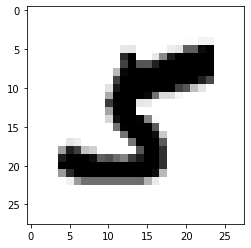

In [5]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)  # iter() creates a data iterator object which will useful during loops like for, while etc.
images, labels = dataiter.next()  

print(images.shape)
print(labels.shape)
# images[0] will be a tensor of 28x28x1 shape i.e. 1 block of 28x28 matrix. There will be 128 such images in a batch as we chose to gave batch 
# size as 128

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[72].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

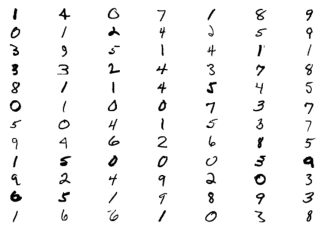

In [6]:
# images[index].numpy().squeeze() -> This helps to remove the 3rd dimension and give us a tensor of shape 28x28 which can be displayed
figure = plt.figure()
num_of_images = 84
for index in range(1, num_of_images + 1):
    plt.subplot(12, 7, index)   # 12 x 7 = 84
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# The model
Let's start with the model we first saw

In [41]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU()
        ) # in = 28x28x1 , out = 28x28x16, RF = 3

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU()
        ) # in = 28x28x16 , out = 28x28x16, RF = 5
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU()
        ) # in = 28x28x16 , out = 28x28x16, RF = 7

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # in = 28x28x16 , out = 14x14x16, RF = 8

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU()
        ) # in = 14x14x16 , out = 14x14x16, RF = 12
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU()
        ) # in = 14x14x16 , out = 14x14x16, RF = 16

        # TRANSITION BLOCK 1
        self.pool2 = nn.MaxPool2d(2, 2) # in = 14x14x16 , out = 7x7x16, RF = 18           

        # OUTPUT BLOCK
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU()
        ) # in = 7x7x10 , out = 7x7x10, RF = 26     
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU()
        ) # in = 7x7x10 , out = 7x7x10, RF = 34             
        self.Gap1 = nn.Sequential(
            nn.AvgPool2d(kernel_size=7)
        )   # in = 7x7x10 , out = 1x1x10, RF = 34     


    def forward(self, x):
        x = self.convblock3(self.convblock2(self.convblock1(x)))
        x = self.pool1(x)
        x = self.convblock5(self.convblock4(x))
        x = self.pool2(x)
        x = self.Gap1(self.convblock7(self.convblock6(x)))
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [42]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             144
              ReLU-2           [-1, 16, 28, 28]               0
            Conv2d-3           [-1, 16, 28, 28]           2,304
              ReLU-4           [-1, 16, 28, 28]               0
            Conv2d-5           [-1, 16, 28, 28]           2,304
              ReLU-6           [-1, 16, 28, 28]               0
         MaxPool2d-7           [-1, 16, 14, 14]               0
            Conv2d-8           [-1, 10, 14, 14]           1,440
              ReLU-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 10, 14, 14]             900
             ReLU-11           [-1, 10, 14, 14]               0
        MaxPool2d-12             [-1, 10, 7, 7]               0
           Conv2d-13             [-1, 10, 7, 7]             900
             ReLU-14             [

# Training and Testing

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs. 

Let's write train and test functions

In [43]:
from tqdm import tqdm

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0  
  loss_epoch = 0
  total_loss_epoch = 0 
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)
    loss_epoch += loss.item()

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    # in view() method the shape of the desired output tensor is to be passed in as the parameter,
    # whereas in view_as() a tensor whose shape is to be mimicked it passed.
    # tensor.view_as(other) is equivalent to tensor.view(other.size())
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)
    if batch_idx == 468:
      train_acc_epoch.append(100*correct/processed)
      total_loss_epoch = round(loss_epoch/batch_idx, 6)
  return total_loss_epoch

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [49]:
def decide_lr(loss_lst, lr1, epoch, loss_dip_dict):

    loss_latest = 0
    loss_prev   = 0,
    loss_earlier = 0, 
    loss_earliest = 0
    loss_dip_latest = 0, 
    loss_dip_earlier = 0, 
    loss_dip_earliest = 0 
    loss_dip_intensity_latest = 0, 
    loss_dip_intensity_earlier = 0    

    if len(loss_lst) < 4:
      lr2 = lr1
      loss_dip_dict[epoch] = (0,0)
    else: 
      loss_latest   = loss_lst[-1]
      loss_prev     = loss_lst[-2]
      loss_earlier  = loss_lst[-3]
      loss_earliest = loss_lst[-4]
      
      loss_dip_latest   = (loss_prev - loss_latest)/loss_prev * 100
      loss_dip_earlier  = (loss_earlier - loss_prev)/loss_earlier * 100
      loss_dip_earliest = (loss_earliest - loss_earlier)/loss_earliest * 100

      loss_dip_intensity_latest  = (loss_dip_latest - loss_dip_earlier)/loss_dip_earlier * 100
      loss_dip_intensity_earlier = (loss_dip_earlier - loss_dip_earliest)/loss_dip_earliest * 100

      #print(f'loss_dip_latest :{loss_dip_latest:0.5f}, loss_dip_earlier: {loss_dip_earlier:0.5f}, loss_dip_earliest : {loss_dip_earliest:0.5f}')
      #print(f'loss_dip_intensity_latest : {loss_dip_intensity_latest:0.5f}, loss_dip_intensity_earlier : {loss_dip_intensity_earlier:0.5f}')
      
      if loss_dip_intensity_latest < 0:
          lr2 = lr1 * 0.9 
          #print(f' Loss not improving in latest epochs - Decreased LR from {lr1} to {lr2}')
      else:
          lr2 = lr1
          #print(f' Retaining same LR : {lr2}')
      loss_dip_dict[epoch] = round(loss_dip_intensity_latest, 4), round(loss_dip_intensity_earlier, 4)

    return lr2, loss_dip_dict

# Let's Train and test our model

  0%|          | 0/469 [00:00<?, ?it/s]

 ***With LR Reduction - Training for lr - 0.01***
EPOCH: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=2.3023979663848877 Batch_id=468 Accuracy=9.20: 100%|██████████| 469/469 [00:10<00:00, 43.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3024, Accuracy: 1008/10000 (10.08%)

EPOCH: 1


Loss=2.283623695373535 Batch_id=468 Accuracy=10.25: 100%|██████████| 469/469 [00:10<00:00, 43.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2746, Accuracy: 980/10000 (9.80%)

EPOCH: 2


Loss=0.5127614736557007 Batch_id=468 Accuracy=47.12: 100%|██████████| 469/469 [00:10<00:00, 44.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4434, Accuracy: 8608/10000 (86.08%)

EPOCH: 3


Loss=0.17194271087646484 Batch_id=468 Accuracy=90.32: 100%|██████████| 469/469 [00:10<00:00, 43.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1997, Accuracy: 9399/10000 (93.99%)

EPOCH: 4


Loss=0.08605290204286575 Batch_id=468 Accuracy=93.96: 100%|██████████| 469/469 [00:10<00:00, 44.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1449, Accuracy: 9557/10000 (95.57%)

lr changed from 0.01 to 0.009000000000000001...loss_dip_dict for latest 2 epoch2 :((-54.2602, 129.3868), (129.3868, 17734.2392))
EPOCH: 5


Loss=0.18227607011795044 Batch_id=468 Accuracy=95.42: 100%|██████████| 469/469 [00:10<00:00, 43.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1552, Accuracy: 9513/10000 (95.13%)

lr changed from 0.009000000000000001 to 0.008100000000000001...loss_dip_dict for latest 2 epoch2 :((-31.27, -54.2602), (-54.2602, 129.3868))
EPOCH: 6


Loss=0.12693731486797333 Batch_id=468 Accuracy=96.08: 100%|██████████| 469/469 [00:10<00:00, 43.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1589, Accuracy: 9505/10000 (95.05%)

lr changed from 0.008100000000000001 to 0.007290000000000001...loss_dip_dict for latest 2 epoch2 :((-37.1879, -31.27), (-31.27, -54.2602))
EPOCH: 7


Loss=0.07354386150836945 Batch_id=468 Accuracy=96.56: 100%|██████████| 469/469 [00:10<00:00, 43.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1040, Accuracy: 9675/10000 (96.75%)

lr changed from 0.007290000000000001 to 0.006561000000000002...loss_dip_dict for latest 2 epoch2 :((-26.8692, -37.1879), (-37.1879, -31.27))
EPOCH: 8


Loss=0.09304758906364441 Batch_id=468 Accuracy=96.81: 100%|██████████| 469/469 [00:10<00:00, 43.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0956, Accuracy: 9712/10000 (97.12%)

lr changed from 0.006561000000000002 to 0.005904900000000002...loss_dip_dict for latest 2 epoch2 :((-15.5761, -26.8692), (-26.8692, -37.1879))
EPOCH: 9


Loss=0.06218342110514641 Batch_id=468 Accuracy=97.01: 100%|██████████| 469/469 [00:11<00:00, 42.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1093, Accuracy: 9662/10000 (96.62%)

lr changed from 0.005904900000000002 to 0.005314410000000002...loss_dip_dict for latest 2 epoch2 :((-37.2081, -15.5761), (-15.5761, -26.8692))
EPOCH: 10


Loss=0.157370924949646 Batch_id=468 Accuracy=97.27: 100%|██████████| 469/469 [00:10<00:00, 42.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0814, Accuracy: 9739/10000 (97.39%)

EPOCH: 11


Loss=0.06683895736932755 Batch_id=468 Accuracy=97.42: 100%|██████████| 469/469 [00:10<00:00, 43.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0839, Accuracy: 9742/10000 (97.42%)

lr changed from 0.005314410000000002 to 0.004782969000000002...loss_dip_dict for latest 2 epoch2 :((-50.1891, 49.7049), (49.7049, -37.2081))
EPOCH: 12


Loss=0.07521066814661026 Batch_id=468 Accuracy=97.56: 100%|██████████| 469/469 [00:10<00:00, 43.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0770, Accuracy: 9760/10000 (97.60%)

EPOCH: 13


Loss=0.10646399855613708 Batch_id=468 Accuracy=97.60: 100%|██████████| 469/469 [00:10<00:00, 43.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0886, Accuracy: 9715/10000 (97.15%)

lr changed from 0.004782969000000002 to 0.004304672100000002...loss_dip_dict for latest 2 epoch2 :((-107.3556, 47.0936), (47.0936, -50.1891))
EPOCH: 14


Loss=0.046798545867204666 Batch_id=468 Accuracy=97.76: 100%|██████████| 469/469 [00:10<00:00, 43.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0714, Accuracy: 9772/10000 (97.72%)

lr changed from 0.004304672100000002 to 0.003874204890000002...loss_dip_dict for latest 2 epoch2 :((-1458.9814, -107.3556), (-107.3556, 47.0936))
{0: (0, 0), 1: (0, 0), 2: (0, 0), 3: (129.3868, 17734.2392), 4: (-54.2602, 129.3868), 5: (-31.27, -54.2602), 6: (-37.1879, -31.27), 7: (-26.8692, -37.1879), 8: (-15.5761, -26.8692), 9: (-37.2081, -15.5761), 10: (49.7049, -37.2081), 11: (-50.1891, 49.7049), 12: (47.0936, -50.1891), 13: (-107.3556, 47.0936), 14: (-1458.9814, -107.3556)}
[2.307457, 2.302998, 1.509306, 0.316131, 0.20182, 0.151663, 0.127988, 0.113377, 0.10245, 0.09625, 0.08753, 0.08358, 0.078032, 0.078413, 0.07321]

Maxium test accuracy: 97.72, Achieved in epoch: 14, Max Train accuracy : 97.76, Achieved in epoch : 14

 ***With LR Reduction - Training for lr - 0.02***
EPOCH: 0


Loss=2.3024418354034424 Batch_id=468 Accuracy=10.70: 100%|██████████| 469/469 [00:10<00:00, 42.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 1298/10000 (12.98%)

EPOCH: 1


Loss=2.301565647125244 Batch_id=468 Accuracy=12.69: 100%|██████████| 469/469 [00:11<00:00, 41.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3018, Accuracy: 1374/10000 (13.74%)

EPOCH: 2


Loss=1.4399633407592773 Batch_id=468 Accuracy=25.32: 100%|██████████| 469/469 [00:10<00:00, 43.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.2631, Accuracy: 5802/10000 (58.02%)

EPOCH: 3


Loss=0.2880810797214508 Batch_id=468 Accuracy=80.15: 100%|██████████| 469/469 [00:11<00:00, 41.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2658, Accuracy: 9229/10000 (92.29%)

EPOCH: 4


Loss=0.3678763210773468 Batch_id=468 Accuracy=93.56: 100%|██████████| 469/469 [00:11<00:00, 42.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1445, Accuracy: 9567/10000 (95.67%)

lr changed from 0.02 to 0.018000000000000002...loss_dip_dict for latest 2 epoch2 :((-6.2857, 551.0965), (551.0965, 103489.1206))
EPOCH: 5


Loss=0.22470371425151825 Batch_id=468 Accuracy=95.37: 100%|██████████| 469/469 [00:11<00:00, 42.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1090, Accuracy: 9655/10000 (96.55%)

lr changed from 0.018000000000000002 to 0.016200000000000003...loss_dip_dict for latest 2 epoch2 :((-56.7488, -6.2857), (-6.2857, 551.0965))
EPOCH: 6


Loss=0.04501809552311897 Batch_id=468 Accuracy=96.24: 100%|██████████| 469/469 [00:11<00:00, 42.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1206, Accuracy: 9618/10000 (96.18%)

lr changed from 0.016200000000000003 to 0.014580000000000003...loss_dip_dict for latest 2 epoch2 :((-28.6994, -56.7488), (-56.7488, -6.2857))
EPOCH: 7


Loss=0.04802880808711052 Batch_id=468 Accuracy=96.97: 100%|██████████| 469/469 [00:10<00:00, 42.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0805, Accuracy: 9737/10000 (97.37%)

lr changed from 0.014580000000000003 to 0.013122000000000003...loss_dip_dict for latest 2 epoch2 :((-15.6558, -28.6994), (-28.6994, -56.7488))
EPOCH: 8


Loss=0.028656741604208946 Batch_id=468 Accuracy=97.25: 100%|██████████| 469/469 [00:11<00:00, 41.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0806, Accuracy: 9749/10000 (97.49%)

lr changed from 0.013122000000000003 to 0.011809800000000004...loss_dip_dict for latest 2 epoch2 :((-15.4117, -15.6558), (-15.6558, -28.6994))
EPOCH: 9


Loss=0.09273984283208847 Batch_id=468 Accuracy=97.65: 100%|██████████| 469/469 [00:10<00:00, 43.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0606, Accuracy: 9813/10000 (98.13%)

lr changed from 0.011809800000000004 to 0.010628820000000004...loss_dip_dict for latest 2 epoch2 :((-7.8361, -15.4117), (-15.4117, -15.6558))
EPOCH: 10


Loss=0.025433791801333427 Batch_id=468 Accuracy=97.94: 100%|██████████| 469/469 [00:11<00:00, 42.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0644, Accuracy: 9803/10000 (98.03%)

lr changed from 0.010628820000000004 to 0.009565938000000005...loss_dip_dict for latest 2 epoch2 :((-13.3684, -7.8361), (-7.8361, -15.4117))
EPOCH: 11


Loss=0.0999257043004036 Batch_id=468 Accuracy=98.04: 100%|██████████| 469/469 [00:11<00:00, 42.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0610, Accuracy: 9812/10000 (98.12%)

lr changed from 0.009565938000000005 to 0.008609344200000004...loss_dip_dict for latest 2 epoch2 :((-27.9765, -13.3684), (-13.3684, -7.8361))
EPOCH: 12


Loss=0.06711453944444656 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:10<00:00, 42.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0654, Accuracy: 9793/10000 (97.93%)

EPOCH: 13


Loss=0.03355090692639351 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:11<00:00, 42.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0486, Accuracy: 9853/10000 (98.53%)

lr changed from 0.008609344200000004 to 0.007748409780000004...loss_dip_dict for latest 2 epoch2 :((-3.4507, 3.0802), (3.0802, -27.9765))
EPOCH: 14


Loss=0.08801718801259995 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:10<00:00, 42.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0434, Accuracy: 9860/10000 (98.60%)

lr changed from 0.007748409780000004 to 0.006973568802000004...loss_dip_dict for latest 2 epoch2 :((-49.6904, -3.4507), (-3.4507, 3.0802))
{0: (0, 0), 1: (0, 0), 2: (0, 0), 3: (551.0965, 103489.1206), 4: (-6.2857, 551.0965), 5: (-56.7488, -6.2857), 6: (-28.6994, -56.7488), 7: (-15.6558, -28.6994), 8: (-15.4117, -15.6558), 9: (-7.8361, -15.4117), 10: (-13.3684, -7.8361), 11: (-27.9765, -13.3684), 12: (3.0802, -27.9765), 13: (-3.4507, 3.0802), 14: (-49.6904, -3.4507)}
[2.307481, 2.307244, 2.061763, 0.633499, 0.222234, 0.159834, 0.127835, 0.106249, 0.091073, 0.079084, 0.070065, 0.06431, 0.058865, 0.054053, 0.05183]

Maxium test accuracy: 98.60, Achieved in epoch: 14, Max Train accuracy : 98.40, Achieved in epoch : 14

 ***With LR Reduction - Training for lr - 0.03***
EPOCH: 0


Loss=2.300549030303955 Batch_id=468 Accuracy=10.93: 100%|██████████| 469/469 [00:11<00:00, 41.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3014, Accuracy: 1032/10000 (10.32%)

EPOCH: 1


Loss=1.6821166276931763 Batch_id=468 Accuracy=20.93: 100%|██████████| 469/469 [00:11<00:00, 41.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.6343, Accuracy: 3756/10000 (37.56%)

EPOCH: 2


Loss=1.677905559539795 Batch_id=468 Accuracy=38.83: 100%|██████████| 469/469 [00:11<00:00, 42.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.5004, Accuracy: 3968/10000 (39.68%)

EPOCH: 3


Loss=1.650591254234314 Batch_id=468 Accuracy=39.54: 100%|██████████| 469/469 [00:11<00:00, 41.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.4675, Accuracy: 4018/10000 (40.18%)

lr changed from 0.03 to 0.027...loss_dip_dict for latest 2 epoch2 :((-83.0564, 212.7889), (0, 0))
EPOCH: 4


Loss=1.554795742034912 Batch_id=468 Accuracy=40.00: 100%|██████████| 469/469 [00:11<00:00, 42.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.4238, Accuracy: 4055/10000 (40.55%)

lr changed from 0.027 to 0.0243...loss_dip_dict for latest 2 epoch2 :((-44.2071, -83.0564), (-83.0564, 212.7889))
EPOCH: 5


Loss=1.2889207601547241 Batch_id=468 Accuracy=40.23: 100%|██████████| 469/469 [00:11<00:00, 41.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.4256, Accuracy: 4052/10000 (40.52%)

lr changed from 0.0243 to 0.02187...loss_dip_dict for latest 2 epoch2 :((-47.2458, -44.2071), (-44.2071, -83.0564))
EPOCH: 6


Loss=1.3368014097213745 Batch_id=468 Accuracy=40.47: 100%|██████████| 469/469 [00:11<00:00, 41.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.4183, Accuracy: 4094/10000 (40.94%)

lr changed from 0.02187 to 0.019683000000000003...loss_dip_dict for latest 2 epoch2 :((-14.56, -47.2458), (-47.2458, -44.2071))
EPOCH: 7


Loss=1.4144245386123657 Batch_id=468 Accuracy=40.74: 100%|██████████| 469/469 [00:11<00:00, 42.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.4114, Accuracy: 4089/10000 (40.89%)

lr changed from 0.019683000000000003 to 0.017714700000000003...loss_dip_dict for latest 2 epoch2 :((-24.347, -14.56), (-14.56, -47.2458))
EPOCH: 8


Loss=1.4726089239120483 Batch_id=468 Accuracy=40.85: 100%|██████████| 469/469 [00:11<00:00, 41.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.3841, Accuracy: 4125/10000 (41.25%)

lr changed from 0.017714700000000003 to 0.015943230000000003...loss_dip_dict for latest 2 epoch2 :((-20.3162, -24.347), (-24.347, -14.56))
EPOCH: 9


Loss=1.3232859373092651 Batch_id=468 Accuracy=40.91: 100%|██████████| 469/469 [00:11<00:00, 41.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.3928, Accuracy: 4099/10000 (40.99%)

lr changed from 0.015943230000000003 to 0.014348907000000003...loss_dip_dict for latest 2 epoch2 :((-55.6912, -20.3162), (-20.3162, -24.347))
EPOCH: 10


Loss=1.4432177543640137 Batch_id=468 Accuracy=40.93: 100%|██████████| 469/469 [00:11<00:00, 42.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.3886, Accuracy: 4119/10000 (41.19%)

lr changed from 0.014348907000000003 to 0.012914016300000003...loss_dip_dict for latest 2 epoch2 :((-19.3128, -55.6912), (-55.6912, -20.3162))
EPOCH: 11


Loss=1.3397098779678345 Batch_id=468 Accuracy=41.01: 100%|██████████| 469/469 [00:11<00:00, 41.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.3818, Accuracy: 4125/10000 (41.25%)

EPOCH: 12


Loss=1.4296693801879883 Batch_id=468 Accuracy=41.02: 100%|██████████| 469/469 [00:11<00:00, 41.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.3780, Accuracy: 4143/10000 (41.43%)

lr changed from 0.012914016300000003 to 0.011622614670000003...loss_dip_dict for latest 2 epoch2 :((-41.9284, 13.1104), (13.1104, -19.3128))
EPOCH: 13


Loss=1.5074667930603027 Batch_id=468 Accuracy=41.07: 100%|██████████| 469/469 [00:11<00:00, 42.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.3776, Accuracy: 4138/10000 (41.38%)

EPOCH: 14


Loss=1.3760277032852173 Batch_id=468 Accuracy=41.07: 100%|██████████| 469/469 [00:11<00:00, 41.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.3763, Accuracy: 4139/10000 (41.39%)

lr changed from 0.011622614670000003 to 0.010460353203000003...loss_dip_dict for latest 2 epoch2 :((-84.7725, 30.1153), (30.1153, -41.9284))
{0: (0, 0), 1: (0, 0), 2: (0, 0), 3: (-83.0564, 212.7889), 4: (-44.2071, -83.0564), 5: (-47.2458, -44.2071), 6: (-14.56, -47.2458), 7: (-24.347, -14.56), 8: (-20.3162, -24.347), 9: (-55.6912, -20.3162), 10: (-19.3128, -55.6912), 11: (13.1104, -19.3128), 12: (-41.9284, 13.1104), 13: (30.1153, -41.9284), 14: (-84.7725, 30.1153)}
[2.303147, 2.112988, 1.567301, 1.49872, 1.462131, 1.4433, 1.427418, 1.415535, 1.406145, 1.402012, 1.398687, 1.394935, 1.392762, 1.389939, 1.38951]

Maxium test accuracy: 41.43, Achieved in epoch: 12, Max Train accuracy : 41.07, Achieved in epoch : 14

 ***With LR Reduction - Training for lr - 0.04***
EPOCH: 0


Loss=2.3025290966033936 Batch_id=468 Accuracy=10.15: 100%|██████████| 469/469 [00:11<00:00, 41.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1009/10000 (10.09%)

EPOCH: 1


Loss=2.3026459217071533 Batch_id=468 Accuracy=9.94: 100%|██████████| 469/469 [00:11<00:00, 41.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 974/10000 (9.74%)

EPOCH: 2


Loss=2.3026087284088135 Batch_id=468 Accuracy=10.66: 100%|██████████| 469/469 [00:11<00:00, 42.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1106/10000 (11.06%)

EPOCH: 3


Loss=2.302635908126831 Batch_id=468 Accuracy=10.58: 100%|██████████| 469/469 [00:11<00:00, 41.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1006/10000 (10.06%)

EPOCH: 4


Loss=2.302581310272217 Batch_id=468 Accuracy=13.24: 100%|██████████| 469/469 [00:11<00:00, 41.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1348/10000 (13.48%)

lr changed from 0.04 to 0.036000000000000004...loss_dip_dict for latest 2 epoch2 :((-175.0001, 300.0002), (300.0002, -100.1862))
EPOCH: 5


Loss=2.3025577068328857 Batch_id=468 Accuracy=14.33: 100%|██████████| 469/469 [00:11<00:00, 41.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1411/10000 (14.11%)

lr changed from 0.036000000000000004 to 0.032400000000000005...loss_dip_dict for latest 2 epoch2 :((-333.333, -175.0001), (-175.0001, 300.0002))
EPOCH: 6


Loss=2.3025453090667725 Batch_id=468 Accuracy=16.53: 100%|██████████| 469/469 [00:11<00:00, 41.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1684/10000 (16.84%)

lr changed from 0.032400000000000005 to 0.029160000000000005...loss_dip_dict for latest 2 epoch2 :((-28.5712, -333.333), (-333.333, -175.0001))
EPOCH: 7


Loss=2.302555799484253 Batch_id=468 Accuracy=17.09: 100%|██████████| 469/469 [00:11<00:00, 41.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1672/10000 (16.72%)

EPOCH: 8


Loss=2.30251145362854 Batch_id=468 Accuracy=17.45: 100%|██████████| 469/469 [00:11<00:00, 41.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 1662/10000 (16.62%)

EPOCH: 9


Loss=2.3019940853118896 Batch_id=468 Accuracy=14.02: 100%|██████████| 469/469 [00:11<00:00, 40.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3024, Accuracy: 958/10000 (9.58%)

EPOCH: 10


Loss=2.3025858402252197 Batch_id=468 Accuracy=13.24: 100%|██████████| 469/469 [00:11<00:00, 41.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

lr changed from 0.029160000000000005 to 0.026244000000000007...loss_dip_dict for latest 2 epoch2 :((-420837.5683, 266.6686), (266.6686, 71.4291))
EPOCH: 11


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:11<00:00, 41.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

lr changed from 0.026244000000000007 to 0.023619600000000008...loss_dip_dict for latest 2 epoch2 :((-192.535, -420837.5683), (-420837.5683, 266.6686))
EPOCH: 12


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:11<00:00, 41.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

lr changed from 0.023619600000000008 to 0.021257640000000008...loss_dip_dict for latest 2 epoch2 :((-100.0239, -192.535), (-192.535, -420837.5683))
EPOCH: 13


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:11<00:00, 41.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

lr changed from 0.021257640000000008 to 0.01913187600000001...loss_dip_dict for latest 2 epoch2 :((-190.2423, -100.0239), (-100.0239, -192.535))
EPOCH: 14


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:11<00:00, 41.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

lr changed from 0.01913187600000001 to 0.017218688400000008...loss_dip_dict for latest 2 epoch2 :((-100.0, -190.2423), (-190.2423, -100.0239))
{0: (0, 0), 1: (0, 0), 2: (0, 0), 3: (300.0002, -100.1862), 4: (-175.0001, 300.0002), 5: (-333.333, -175.0001), 6: (-28.5712, -333.333), 7: (40.0003, -28.5712), 8: (71.4291, 40.0003), 9: (266.6686, 71.4291), 10: (-420837.5683, 266.6686), 11: (-192.535, -420837.5683), 12: (-100.0239, -192.535), 13: (-190.2423, -100.0239), 14: (-100.0, -190.2423)}
[2.306965, 2.307502, 2.307501, 2.307497, 2.3075, 2.307493, 2.307488, 2.307481, 2.307469, 2.307425, 2.492546, 2.307501, 2.307542, 2.307505, 2.307505]

Maxium test accuracy: 16.84, Achieved in epoch: 6, Max Train accuracy : 17.45, Achieved in epoch : 8

 ***With LR Reduction - Training for lr - 0.05***
EPOCH: 0


Loss=1.3509677648544312 Batch_id=468 Accuracy=14.56: 100%|██████████| 469/469 [00:11<00:00, 41.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.4770, Accuracy: 5179/10000 (51.79%)

EPOCH: 1


Loss=0.18379877507686615 Batch_id=468 Accuracy=82.01: 100%|██████████| 469/469 [00:11<00:00, 40.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2826, Accuracy: 9133/10000 (91.33%)

EPOCH: 2


Loss=0.09291308373212814 Batch_id=468 Accuracy=93.29: 100%|██████████| 469/469 [00:11<00:00, 41.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2000, Accuracy: 9361/10000 (93.61%)

EPOCH: 3


Loss=0.24815703928470612 Batch_id=468 Accuracy=95.19: 100%|██████████| 469/469 [00:11<00:00, 40.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2113, Accuracy: 9360/10000 (93.60%)

lr changed from 0.05 to 0.045000000000000005...loss_dip_dict for latest 2 epoch2 :((-53.8466, -16.6794), (0, 0))
EPOCH: 4


Loss=0.0463809072971344 Batch_id=468 Accuracy=96.34: 100%|██████████| 469/469 [00:11<00:00, 40.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1059, Accuracy: 9665/10000 (96.65%)

lr changed from 0.045000000000000005 to 0.04050000000000001...loss_dip_dict for latest 2 epoch2 :((-10.7789, -53.8466), (-53.8466, -16.6794))
EPOCH: 5


Loss=0.055738527327775955 Batch_id=468 Accuracy=97.04: 100%|██████████| 469/469 [00:11<00:00, 40.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1003, Accuracy: 9692/10000 (96.92%)

lr changed from 0.04050000000000001 to 0.03645000000000001...loss_dip_dict for latest 2 epoch2 :((-20.2899, -10.7789), (-10.7789, -53.8466))
EPOCH: 6


Loss=0.03830961510539055 Batch_id=468 Accuracy=97.36: 100%|██████████| 469/469 [00:11<00:00, 41.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0828, Accuracy: 9748/10000 (97.48%)

lr changed from 0.03645000000000001 to 0.03280500000000001...loss_dip_dict for latest 2 epoch2 :((-35.1199, -20.2899), (-20.2899, -10.7789))
EPOCH: 7


Loss=0.048179108649492264 Batch_id=468 Accuracy=97.56: 100%|██████████| 469/469 [00:11<00:00, 41.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0822, Accuracy: 9749/10000 (97.49%)

lr changed from 0.03280500000000001 to 0.02952450000000001...loss_dip_dict for latest 2 epoch2 :((-38.7204, -35.1199), (-35.1199, -20.2899))
EPOCH: 8


Loss=0.02899094857275486 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:11<00:00, 40.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0687, Accuracy: 9781/10000 (97.81%)

EPOCH: 9


Loss=0.025339549407362938 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:11<00:00, 40.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0582, Accuracy: 9806/10000 (98.06%)

lr changed from 0.02952450000000001 to 0.02657205000000001...loss_dip_dict for latest 2 epoch2 :((-90.9524, 115.763), (115.763, -38.7204))
EPOCH: 10


Loss=0.006991231348365545 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:11<00:00, 40.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0596, Accuracy: 9811/10000 (98.11%)

EPOCH: 11


Loss=0.008411594666540623 Batch_id=468 Accuracy=98.35: 100%|██████████| 469/469 [00:11<00:00, 40.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0686, Accuracy: 9787/10000 (97.87%)

lr changed from 0.02657205000000001 to 0.02391484500000001...loss_dip_dict for latest 2 epoch2 :((-33.7979, 597.2664), (597.2664, -90.9524))
EPOCH: 12


Loss=0.07750052213668823 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:11<00:00, 40.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0574, Accuracy: 9822/10000 (98.22%)

EPOCH: 13


Loss=0.02255786955356598 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:11<00:00, 40.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0601, Accuracy: 9814/10000 (98.14%)

lr changed from 0.02391484500000001 to 0.021523360500000012...loss_dip_dict for latest 2 epoch2 :((-114.7849, 53.517), (53.517, -33.7979))
EPOCH: 14


Loss=0.004685812629759312 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:11<00:00, 39.89it/s]



Test set: Average loss: 0.0537, Accuracy: 9839/10000 (98.39%)

lr changed from 0.021523360500000012 to 0.01937102445000001...loss_dip_dict for latest 2 epoch2 :((-956.4138, -114.7849), (-114.7849, 53.517))
{0: (0, 0), 1: (0, 0), 2: (0, 0), 3: (-53.8466, -16.6794), 4: (-10.7789, -53.8466), 5: (-20.2899, -10.7789), 6: (-35.1199, -20.2899), 7: (-38.7204, -35.1199), 8: (115.763, -38.7204), 9: (-90.9524, 115.763), 10: (597.2664, -90.9524), 11: (-33.7979, 597.2664), 12: (53.517, -33.7979), 13: (-114.7849, 53.517), 14: (-956.4138, -114.7849)}
[2.234702, 0.597154, 0.232557, 0.167024, 0.125031, 0.099974, 0.086975, 0.080045, 0.066284, 0.065253, 0.058176, 0.053999, 0.048047, 0.04883, 0.042015]

Maxium test accuracy: 98.39, Achieved in epoch: 14, Max Train accuracy : 98.68, Achieved in epoch : 14



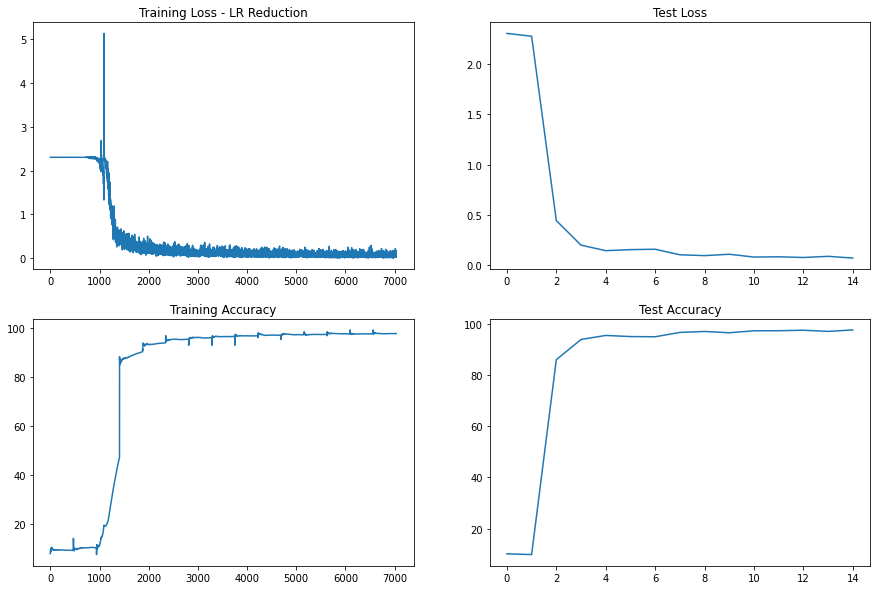

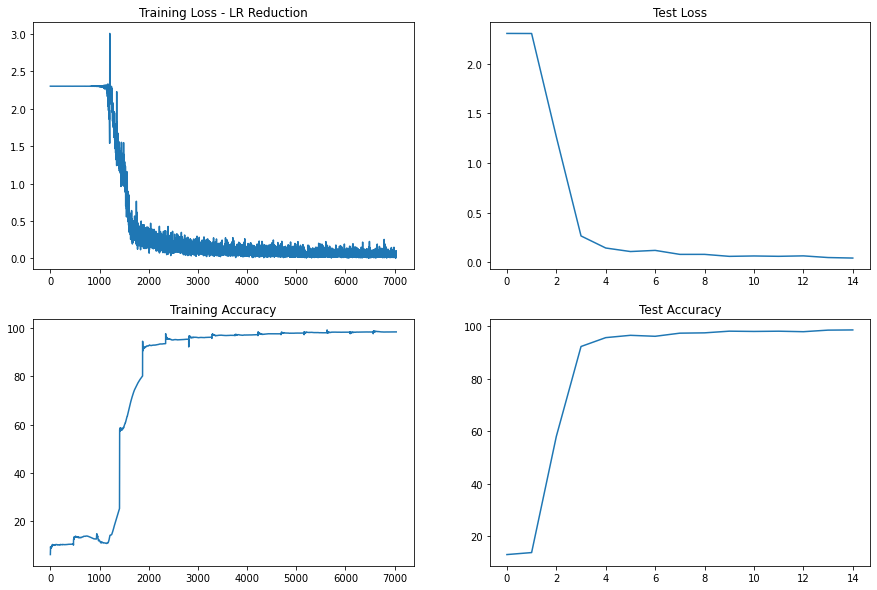

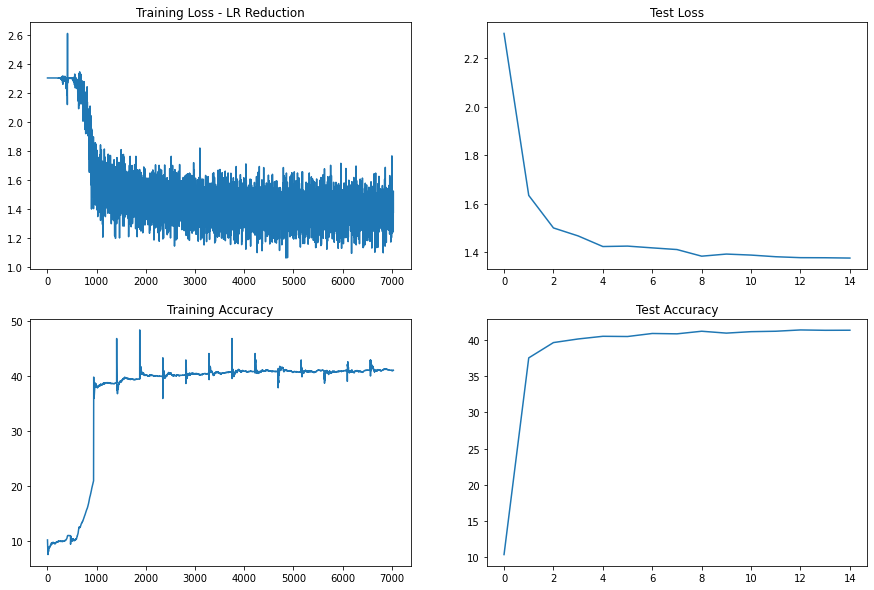

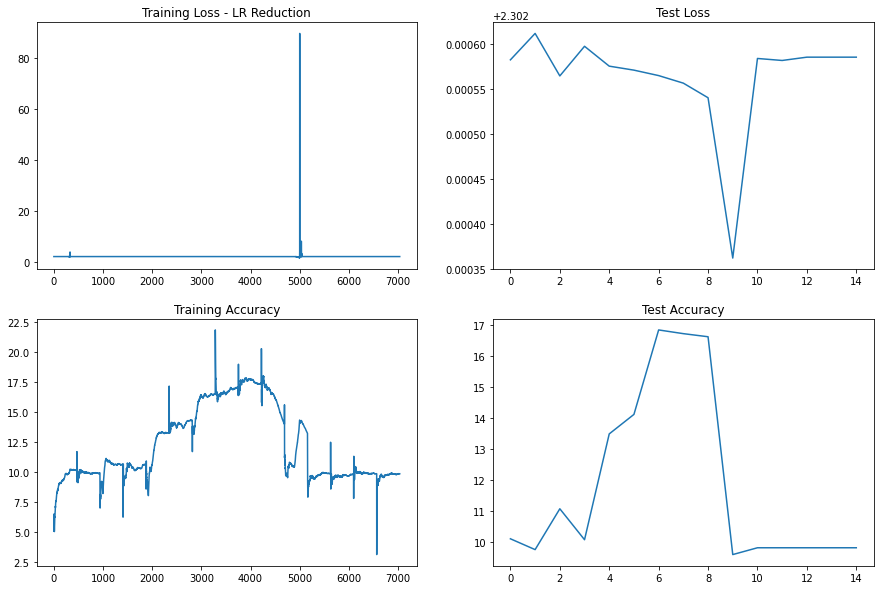

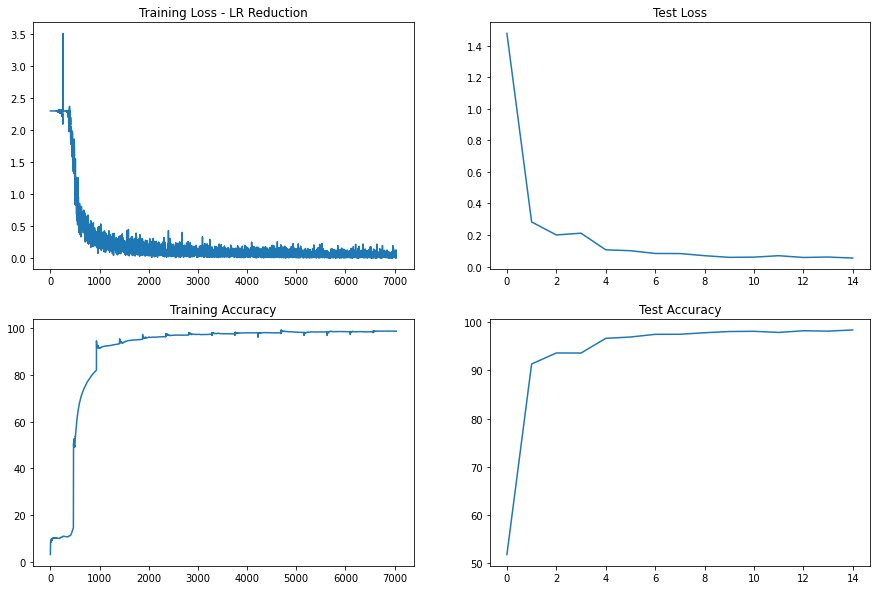

In [51]:
l_rate = [0.01, 0.02, 0.03, 0.04, 0.05]

for rate in l_rate:  
    print(f' ***With LR Reduction - Training for lr - {rate}***')

    model =  Net().to(device)
    train_losses = []
    test_losses = []
    train_acc = []
    test_acc = []
    train_acc_epoch  = []
    loss_dip_dict    = {}
    train_loss_epoch = []
    lr = rate
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    EPOCHS = 15

    for epoch in range(EPOCHS):  
        print("EPOCH:", epoch)
        total_loss_epoch = train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)

        train_loss_epoch.append(total_loss_epoch)
        new_lr, loss_dip_dict = decide_lr(train_loss_epoch, lr, epoch, loss_dip_dict)
        if round(new_lr, 8) !=  round(lr, 8):
          print(f'lr changed from {lr} to {new_lr}...loss_dip_dict for latest 2 epoch2 :{loss_dip_dict[epoch], loss_dip_dict[epoch-1]}')
          lr = new_lr          
          optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
          
    print(loss_dip_dict)
    print(train_loss_epoch)

    print('\nMaxium test accuracy: {:.2f}, Achieved in epoch: {}, Max Train accuracy : {:.2f}, Achieved in epoch : {}\n'.format(
        max(test_acc),  np.argmax(test_acc) , max(train_acc_epoch), np.argmax(train_acc_epoch))   )
    
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].plot(train_losses)
    axs[0, 0].set_title("Training Loss - LR Reduction")
    axs[1, 0].plot(train_acc)
    axs[1, 0].set_title("Training Accuracy")
    axs[0, 1].plot(test_losses)
    axs[0, 1].set_title("Test Loss")
    axs[1, 1].plot(test_acc)
    axs[1, 1].set_title("Test Accuracy")

  0%|          | 0/469 [00:00<?, ?it/s]

 ***No LR reductions - Training for lr - 0.006***
EPOCH: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=2.2842044830322266 Batch_id=468 Accuracy=10.35: 100%|██████████| 469/469 [00:11<00:00, 42.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2472, Accuracy: 1786/10000 (17.86%)

EPOCH: 1


Loss=2.3026180267333984 Batch_id=468 Accuracy=11.57: 100%|██████████| 469/469 [00:10<00:00, 43.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1009/10000 (10.09%)

EPOCH: 2


Loss=2.302534341812134 Batch_id=468 Accuracy=9.91: 100%|██████████| 469/469 [00:10<00:00, 43.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1009/10000 (10.09%)

EPOCH: 3


Loss=2.3025996685028076 Batch_id=468 Accuracy=9.91: 100%|██████████| 469/469 [00:10<00:00, 42.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1009/10000 (10.09%)

EPOCH: 4


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1009/10000 (10.09%)

EPOCH: 5


Loss=2.302577257156372 Batch_id=468 Accuracy=9.91: 100%|██████████| 469/469 [00:10<00:00, 43.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1009/10000 (10.09%)

EPOCH: 6


Loss=2.3026044368743896 Batch_id=468 Accuracy=9.93: 100%|██████████| 469/469 [00:10<00:00, 43.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1010/10000 (10.10%)

EPOCH: 7


Loss=2.3025693893432617 Batch_id=468 Accuracy=9.95: 100%|██████████| 469/469 [00:10<00:00, 42.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1015/10000 (10.15%)

EPOCH: 8


Loss=2.3025102615356445 Batch_id=468 Accuracy=10.04: 100%|██████████| 469/469 [00:11<00:00, 42.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1029/10000 (10.29%)

EPOCH: 9


Loss=2.302450180053711 Batch_id=468 Accuracy=10.40: 100%|██████████| 469/469 [00:11<00:00, 42.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 1085/10000 (10.85%)

EPOCH: 10


Loss=2.3025710582733154 Batch_id=468 Accuracy=11.32: 100%|██████████| 469/469 [00:11<00:00, 42.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 1255/10000 (12.55%)

EPOCH: 11


Loss=2.3024003505706787 Batch_id=468 Accuracy=13.40: 100%|██████████| 469/469 [00:11<00:00, 42.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 1429/10000 (14.29%)

EPOCH: 12


Loss=2.3025176525115967 Batch_id=468 Accuracy=14.70: 100%|██████████| 469/469 [00:10<00:00, 43.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 1378/10000 (13.78%)

EPOCH: 13


Loss=2.3023736476898193 Batch_id=468 Accuracy=13.39: 100%|██████████| 469/469 [00:11<00:00, 42.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 1153/10000 (11.53%)

EPOCH: 14


Loss=2.3021576404571533 Batch_id=468 Accuracy=10.96: 100%|██████████| 469/469 [00:10<00:00, 42.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3024, Accuracy: 992/10000 (9.92%)


Maxium test accuracy: 17.86, Achieved in epoch: 0, Max Train accuracy : 14.70, Achieved in epoch : 12

 ***No LR reductions - Training for lr - 0.007***
EPOCH: 0


Loss=2.3024652004241943 Batch_id=468 Accuracy=12.34: 100%|██████████| 469/469 [00:10<00:00, 43.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 2120/10000 (21.20%)

EPOCH: 1


Loss=2.301845073699951 Batch_id=468 Accuracy=19.16: 100%|██████████| 469/469 [00:11<00:00, 41.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3022, Accuracy: 1782/10000 (17.82%)

EPOCH: 2


Loss=2.2863149642944336 Batch_id=468 Accuracy=17.44: 100%|██████████| 469/469 [00:10<00:00, 43.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2851, Accuracy: 1773/10000 (17.73%)

EPOCH: 3


Loss=0.33791637420654297 Batch_id=468 Accuracy=60.34: 100%|██████████| 469/469 [00:11<00:00, 41.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3562, Accuracy: 8981/10000 (89.81%)

EPOCH: 4


Loss=0.35944536328315735 Batch_id=468 Accuracy=90.70: 100%|██████████| 469/469 [00:11<00:00, 41.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2168, Accuracy: 9349/10000 (93.49%)

EPOCH: 5


Loss=0.35152387619018555 Batch_id=468 Accuracy=94.09: 100%|██████████| 469/469 [00:11<00:00, 40.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1732, Accuracy: 9468/10000 (94.68%)

EPOCH: 6


Loss=0.20243452489376068 Batch_id=468 Accuracy=95.27: 100%|██████████| 469/469 [00:11<00:00, 41.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1621, Accuracy: 9519/10000 (95.19%)

EPOCH: 7


Loss=0.21737676858901978 Batch_id=468 Accuracy=96.04: 100%|██████████| 469/469 [00:11<00:00, 41.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0912, Accuracy: 9724/10000 (97.24%)

EPOCH: 8


Loss=0.16879157721996307 Batch_id=468 Accuracy=96.53: 100%|██████████| 469/469 [00:11<00:00, 41.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1072, Accuracy: 9657/10000 (96.57%)

EPOCH: 9


Loss=0.10949055105447769 Batch_id=468 Accuracy=97.05: 100%|██████████| 469/469 [00:10<00:00, 42.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0736, Accuracy: 9771/10000 (97.71%)

EPOCH: 10


Loss=0.12093955278396606 Batch_id=468 Accuracy=97.23: 100%|██████████| 469/469 [00:11<00:00, 42.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0701, Accuracy: 9772/10000 (97.72%)

EPOCH: 11


Loss=0.0955602303147316 Batch_id=468 Accuracy=97.36: 100%|██████████| 469/469 [00:11<00:00, 41.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0630, Accuracy: 9802/10000 (98.02%)

EPOCH: 12


Loss=0.09635951370000839 Batch_id=468 Accuracy=97.52: 100%|██████████| 469/469 [00:11<00:00, 41.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0640, Accuracy: 9813/10000 (98.13%)

EPOCH: 13


Loss=0.01520033273845911 Batch_id=468 Accuracy=97.72: 100%|██████████| 469/469 [00:11<00:00, 41.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0655, Accuracy: 9795/10000 (97.95%)

EPOCH: 14


Loss=0.02428949624300003 Batch_id=468 Accuracy=97.85: 100%|██████████| 469/469 [00:11<00:00, 42.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0665, Accuracy: 9796/10000 (97.96%)


Maxium test accuracy: 98.13, Achieved in epoch: 12, Max Train accuracy : 97.85, Achieved in epoch : 14

 ***No LR reductions - Training for lr - 0.008***
EPOCH: 0


Loss=2.3025689125061035 Batch_id=468 Accuracy=11.40: 100%|██████████| 469/469 [00:11<00:00, 42.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3024, Accuracy: 1127/10000 (11.27%)

EPOCH: 1


Loss=2.284043073654175 Batch_id=468 Accuracy=11.08: 100%|██████████| 469/469 [00:11<00:00, 41.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2965, Accuracy: 980/10000 (9.80%)

EPOCH: 2


Loss=0.25080227851867676 Batch_id=468 Accuracy=47.96: 100%|██████████| 469/469 [00:11<00:00, 41.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3371, Accuracy: 8923/10000 (89.23%)

EPOCH: 3


Loss=0.14490027725696564 Batch_id=468 Accuracy=92.40: 100%|██████████| 469/469 [00:11<00:00, 42.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1603, Accuracy: 9521/10000 (95.21%)

EPOCH: 4


Loss=0.10671364516019821 Batch_id=468 Accuracy=94.61: 100%|██████████| 469/469 [00:11<00:00, 41.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1619, Accuracy: 9481/10000 (94.81%)

EPOCH: 5


Loss=0.05543169379234314 Batch_id=468 Accuracy=95.39: 100%|██████████| 469/469 [00:11<00:00, 41.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1093, Accuracy: 9651/10000 (96.51%)

EPOCH: 6


Loss=0.21321527659893036 Batch_id=468 Accuracy=96.03: 100%|██████████| 469/469 [00:11<00:00, 41.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0927, Accuracy: 9703/10000 (97.03%)

EPOCH: 7


Loss=0.05962122604250908 Batch_id=468 Accuracy=96.25: 100%|██████████| 469/469 [00:11<00:00, 39.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0824, Accuracy: 9737/10000 (97.37%)

EPOCH: 8


Loss=0.05177949741482735 Batch_id=468 Accuracy=96.73: 100%|██████████| 469/469 [00:12<00:00, 38.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0785, Accuracy: 9753/10000 (97.53%)

EPOCH: 9


Loss=0.15774017572402954 Batch_id=468 Accuracy=96.95: 100%|██████████| 469/469 [00:12<00:00, 38.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0769, Accuracy: 9759/10000 (97.59%)

EPOCH: 10


Loss=0.21431110799312592 Batch_id=468 Accuracy=97.09: 100%|██████████| 469/469 [00:11<00:00, 39.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1626, Accuracy: 9515/10000 (95.15%)

EPOCH: 11


Loss=0.04194210097193718 Batch_id=468 Accuracy=97.30: 100%|██████████| 469/469 [00:11<00:00, 40.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0660, Accuracy: 9792/10000 (97.92%)

EPOCH: 12


Loss=0.04320049285888672 Batch_id=468 Accuracy=97.43: 100%|██████████| 469/469 [00:11<00:00, 41.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0701, Accuracy: 9782/10000 (97.82%)

EPOCH: 13


Loss=0.11781809478998184 Batch_id=468 Accuracy=97.67: 100%|██████████| 469/469 [00:11<00:00, 40.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0878, Accuracy: 9725/10000 (97.25%)

EPOCH: 14


Loss=0.047880563884973526 Batch_id=468 Accuracy=97.64: 100%|██████████| 469/469 [00:11<00:00, 41.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0855, Accuracy: 9708/10000 (97.08%)


Maxium test accuracy: 97.92, Achieved in epoch: 11, Max Train accuracy : 97.67, Achieved in epoch : 13

 ***No LR reductions - Training for lr - 0.009***
EPOCH: 0


Loss=2.302427291870117 Batch_id=468 Accuracy=9.95: 100%|██████████| 469/469 [00:11<00:00, 41.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 958/10000 (9.58%)

EPOCH: 1


Loss=2.302584409713745 Batch_id=468 Accuracy=9.86: 100%|██████████| 469/469 [00:11<00:00, 40.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 958/10000 (9.58%)

EPOCH: 2


Loss=2.302281141281128 Batch_id=468 Accuracy=10.02: 100%|██████████| 469/469 [00:11<00:00, 40.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3022, Accuracy: 1211/10000 (12.11%)

EPOCH: 3


Loss=1.6218386888504028 Batch_id=468 Accuracy=17.07: 100%|██████████| 469/469 [00:11<00:00, 39.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.6856, Accuracy: 4356/10000 (43.56%)

EPOCH: 4


Loss=0.21578656136989594 Batch_id=468 Accuracy=82.27: 100%|██████████| 469/469 [00:11<00:00, 40.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2199, Accuracy: 9344/10000 (93.44%)

EPOCH: 5


Loss=0.24683968722820282 Batch_id=468 Accuracy=93.21: 100%|██████████| 469/469 [00:11<00:00, 40.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1864, Accuracy: 9433/10000 (94.33%)

EPOCH: 6


Loss=0.10584411770105362 Batch_id=468 Accuracy=95.05: 100%|██████████| 469/469 [00:11<00:00, 40.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1297, Accuracy: 9603/10000 (96.03%)

EPOCH: 7


Loss=0.08848541975021362 Batch_id=468 Accuracy=96.04: 100%|██████████| 469/469 [00:11<00:00, 40.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1107, Accuracy: 9648/10000 (96.48%)

EPOCH: 8


Loss=0.17254070937633514 Batch_id=468 Accuracy=96.64: 100%|██████████| 469/469 [00:11<00:00, 39.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0916, Accuracy: 9712/10000 (97.12%)

EPOCH: 9


Loss=0.04862670972943306 Batch_id=468 Accuracy=97.18: 100%|██████████| 469/469 [00:11<00:00, 40.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0759, Accuracy: 9774/10000 (97.74%)

EPOCH: 10


Loss=0.07163351774215698 Batch_id=468 Accuracy=97.39: 100%|██████████| 469/469 [00:11<00:00, 39.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0846, Accuracy: 9717/10000 (97.17%)

EPOCH: 11


Loss=0.028536243364214897 Batch_id=468 Accuracy=97.50: 100%|██████████| 469/469 [00:11<00:00, 39.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0809, Accuracy: 9753/10000 (97.53%)

EPOCH: 12


Loss=0.07381940633058548 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:11<00:00, 40.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0646, Accuracy: 9797/10000 (97.97%)

EPOCH: 13


Loss=0.0423223040997982 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:11<00:00, 39.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0659, Accuracy: 9798/10000 (97.98%)

EPOCH: 14


Loss=0.11693882942199707 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:11<00:00, 40.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0730, Accuracy: 9762/10000 (97.62%)


Maxium test accuracy: 97.98, Achieved in epoch: 13, Max Train accuracy : 98.01, Achieved in epoch : 14

 ***No LR reductions - Training for lr - 0.01***
EPOCH: 0


Loss=2.2915196418762207 Batch_id=468 Accuracy=10.00: 100%|██████████| 469/469 [00:11<00:00, 39.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2971, Accuracy: 980/10000 (9.80%)

EPOCH: 1


Loss=2.3013012409210205 Batch_id=468 Accuracy=12.85: 100%|██████████| 469/469 [00:11<00:00, 39.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 1028/10000 (10.28%)

EPOCH: 2


Loss=2.0330231189727783 Batch_id=468 Accuracy=12.75: 100%|██████████| 469/469 [00:11<00:00, 39.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.1110, Accuracy: 2643/10000 (26.43%)

EPOCH: 3


Loss=1.0309988260269165 Batch_id=468 Accuracy=53.17: 100%|██████████| 469/469 [00:11<00:00, 39.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9820, Accuracy: 6706/10000 (67.06%)

EPOCH: 4


Loss=0.7767570614814758 Batch_id=468 Accuracy=69.05: 100%|██████████| 469/469 [00:11<00:00, 39.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7995, Accuracy: 7166/10000 (71.66%)

EPOCH: 5


Loss=0.6512009501457214 Batch_id=468 Accuracy=73.00: 100%|██████████| 469/469 [00:12<00:00, 38.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7141, Accuracy: 7479/10000 (74.79%)

EPOCH: 6


Loss=0.7273465991020203 Batch_id=468 Accuracy=75.63: 100%|██████████| 469/469 [00:11<00:00, 39.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.6690, Accuracy: 7580/10000 (75.80%)

EPOCH: 7


Loss=0.5677452683448792 Batch_id=468 Accuracy=77.10: 100%|██████████| 469/469 [00:12<00:00, 39.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.6612, Accuracy: 7665/10000 (76.65%)

EPOCH: 8


Loss=0.7049341797828674 Batch_id=468 Accuracy=78.08: 100%|██████████| 469/469 [00:12<00:00, 38.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.6207, Accuracy: 7938/10000 (79.38%)

EPOCH: 9


Loss=0.7595073580741882 Batch_id=468 Accuracy=79.66: 100%|██████████| 469/469 [00:12<00:00, 38.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.6156, Accuracy: 8223/10000 (82.23%)

EPOCH: 10


Loss=0.5167679190635681 Batch_id=468 Accuracy=80.49: 100%|██████████| 469/469 [00:12<00:00, 38.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5964, Accuracy: 8272/10000 (82.72%)

EPOCH: 11


Loss=0.7754302620887756 Batch_id=468 Accuracy=81.34: 100%|██████████| 469/469 [00:12<00:00, 38.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5968, Accuracy: 7899/10000 (78.99%)

EPOCH: 12


Loss=0.5409809350967407 Batch_id=468 Accuracy=81.65: 100%|██████████| 469/469 [00:11<00:00, 39.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5702, Accuracy: 8207/10000 (82.07%)

EPOCH: 13


Loss=0.5298140645027161 Batch_id=468 Accuracy=82.25: 100%|██████████| 469/469 [00:12<00:00, 38.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5985, Accuracy: 8010/10000 (80.10%)

EPOCH: 14


Loss=0.5405962467193604 Batch_id=468 Accuracy=82.78: 100%|██████████| 469/469 [00:12<00:00, 38.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5608, Accuracy: 8338/10000 (83.38%)


Maxium test accuracy: 83.38, Achieved in epoch: 14, Max Train accuracy : 82.78, Achieved in epoch : 14

 ***No LR reductions - Training for lr - 0.015***
EPOCH: 0


Loss=2.3025548458099365 Batch_id=468 Accuracy=9.93: 100%|██████████| 469/469 [00:12<00:00, 38.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3022, Accuracy: 1032/10000 (10.32%)

EPOCH: 1


Loss=1.7256759405136108 Batch_id=468 Accuracy=13.39: 100%|██████████| 469/469 [00:11<00:00, 39.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.8495, Accuracy: 4464/10000 (44.64%)

EPOCH: 2


Loss=1.149397373199463 Batch_id=468 Accuracy=54.66: 100%|██████████| 469/469 [00:12<00:00, 38.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.1140, Accuracy: 5770/10000 (57.70%)

EPOCH: 3


Loss=1.0053712129592896 Batch_id=468 Accuracy=57.53: 100%|██████████| 469/469 [00:12<00:00, 38.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.0488, Accuracy: 5862/10000 (58.62%)

EPOCH: 4


Loss=0.9488762021064758 Batch_id=468 Accuracy=58.08: 100%|██████████| 469/469 [00:12<00:00, 38.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.0243, Accuracy: 5903/10000 (59.03%)

EPOCH: 5


Loss=1.2708286046981812 Batch_id=468 Accuracy=58.40: 100%|██████████| 469/469 [00:12<00:00, 38.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.0059, Accuracy: 5899/10000 (58.99%)

EPOCH: 6


Loss=0.8821476101875305 Batch_id=468 Accuracy=58.74: 100%|██████████| 469/469 [00:11<00:00, 39.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.0041, Accuracy: 5930/10000 (59.30%)

EPOCH: 7


Loss=1.2205361127853394 Batch_id=468 Accuracy=58.87: 100%|██████████| 469/469 [00:12<00:00, 37.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9815, Accuracy: 5969/10000 (59.69%)

EPOCH: 8


Loss=1.0730630159378052 Batch_id=468 Accuracy=58.98: 100%|██████████| 469/469 [00:12<00:00, 38.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9790, Accuracy: 5939/10000 (59.39%)

EPOCH: 9


Loss=0.9999217391014099 Batch_id=468 Accuracy=59.18: 100%|██████████| 469/469 [00:12<00:00, 37.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9702, Accuracy: 5982/10000 (59.82%)

EPOCH: 10


Loss=1.191543698310852 Batch_id=468 Accuracy=59.12: 100%|██████████| 469/469 [00:12<00:00, 38.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9695, Accuracy: 5976/10000 (59.76%)

EPOCH: 11


Loss=0.9627907872200012 Batch_id=468 Accuracy=59.37: 100%|██████████| 469/469 [00:12<00:00, 37.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9657, Accuracy: 5999/10000 (59.99%)

EPOCH: 12


Loss=0.8641933798789978 Batch_id=468 Accuracy=59.38: 100%|██████████| 469/469 [00:12<00:00, 38.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9696, Accuracy: 5969/10000 (59.69%)

EPOCH: 13


Loss=0.9470699429512024 Batch_id=468 Accuracy=59.46: 100%|██████████| 469/469 [00:12<00:00, 38.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9572, Accuracy: 6005/10000 (60.05%)

EPOCH: 14


Loss=0.9820716977119446 Batch_id=468 Accuracy=59.54: 100%|██████████| 469/469 [00:12<00:00, 38.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9694, Accuracy: 5986/10000 (59.86%)


Maxium test accuracy: 60.05, Achieved in epoch: 13, Max Train accuracy : 59.54, Achieved in epoch : 14

 ***No LR reductions - Training for lr - 0.02***
EPOCH: 0


Loss=2.302555561065674 Batch_id=468 Accuracy=9.19: 100%|██████████| 469/469 [00:12<00:00, 38.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 1444/10000 (14.44%)

EPOCH: 1


Loss=2.3023765087127686 Batch_id=468 Accuracy=14.51: 100%|██████████| 469/469 [00:12<00:00, 37.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3024, Accuracy: 1220/10000 (12.20%)

EPOCH: 2


Loss=2.3028154373168945 Batch_id=468 Accuracy=11.37: 100%|██████████| 469/469 [00:12<00:00, 38.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3028, Accuracy: 773/10000 (7.73%)

EPOCH: 3


Loss=2.2771265506744385 Batch_id=468 Accuracy=10.56: 100%|██████████| 469/469 [00:12<00:00, 38.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2374, Accuracy: 1272/10000 (12.72%)

EPOCH: 4


Loss=1.3260865211486816 Batch_id=468 Accuracy=21.73: 100%|██████████| 469/469 [00:12<00:00, 38.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.3946, Accuracy: 5796/10000 (57.96%)

EPOCH: 5


Loss=0.6834138035774231 Batch_id=468 Accuracy=69.50: 100%|██████████| 469/469 [00:12<00:00, 38.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.8805, Accuracy: 7383/10000 (73.83%)

EPOCH: 6


Loss=0.4527987241744995 Batch_id=468 Accuracy=80.24: 100%|██████████| 469/469 [00:12<00:00, 38.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5585, Accuracy: 8408/10000 (84.08%)

EPOCH: 7


Loss=0.4797237813472748 Batch_id=468 Accuracy=84.66: 100%|██████████| 469/469 [00:12<00:00, 37.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4021, Accuracy: 8674/10000 (86.74%)

EPOCH: 8


Loss=0.4490493834018707 Batch_id=468 Accuracy=86.31: 100%|██████████| 469/469 [00:12<00:00, 37.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3579, Accuracy: 8760/10000 (87.60%)

EPOCH: 9


Loss=0.35661780834198 Batch_id=468 Accuracy=87.05: 100%|██████████| 469/469 [00:12<00:00, 37.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3341, Accuracy: 8817/10000 (88.17%)

EPOCH: 10


Loss=0.2621666193008423 Batch_id=468 Accuracy=87.62: 100%|██████████| 469/469 [00:12<00:00, 37.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3201, Accuracy: 8848/10000 (88.48%)

EPOCH: 11


Loss=0.3677583634853363 Batch_id=468 Accuracy=88.12: 100%|██████████| 469/469 [00:12<00:00, 38.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3096, Accuracy: 8890/10000 (88.90%)

EPOCH: 12


Loss=0.15831875801086426 Batch_id=468 Accuracy=88.33: 100%|██████████| 469/469 [00:12<00:00, 37.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3054, Accuracy: 8895/10000 (88.95%)

EPOCH: 13


Loss=0.23094554245471954 Batch_id=468 Accuracy=88.64: 100%|██████████| 469/469 [00:17<00:00, 26.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2889, Accuracy: 8924/10000 (89.24%)

EPOCH: 14


Loss=0.4075869619846344 Batch_id=468 Accuracy=88.91: 100%|██████████| 469/469 [00:12<00:00, 37.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2781, Accuracy: 8958/10000 (89.58%)


Maxium test accuracy: 89.58, Achieved in epoch: 14, Max Train accuracy : 88.91, Achieved in epoch : 14

 ***No LR reductions - Training for lr - 0.025***
EPOCH: 0


Loss=2.3025901317596436 Batch_id=468 Accuracy=10.41: 100%|██████████| 469/469 [00:12<00:00, 37.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 1478/10000 (14.78%)

EPOCH: 1


Loss=2.3023719787597656 Batch_id=468 Accuracy=13.02: 100%|██████████| 469/469 [00:12<00:00, 38.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3024, Accuracy: 977/10000 (9.77%)

EPOCH: 2


Loss=2.3004848957061768 Batch_id=468 Accuracy=12.18: 100%|██████████| 469/469 [00:12<00:00, 37.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3021, Accuracy: 958/10000 (9.58%)

EPOCH: 3


Loss=2.3025858402252197 Batch_id=468 Accuracy=12.52: 100%|██████████| 469/469 [00:12<00:00, 37.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 4


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 5


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 6


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 7


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 8


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 9


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 10


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 11


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 12


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 13


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 14


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)


Maxium test accuracy: 14.78, Achieved in epoch: 0, Max Train accuracy : 13.02, Achieved in epoch : 1

 ***No LR reductions - Training for lr - 0.03***
EPOCH: 0


Loss=2.2843105792999268 Batch_id=468 Accuracy=10.44: 100%|██████████| 469/469 [00:12<00:00, 36.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2826, Accuracy: 1417/10000 (14.17%)

EPOCH: 1


Loss=1.0396467447280884 Batch_id=468 Accuracy=28.58: 100%|██████████| 469/469 [00:12<00:00, 37.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9763, Accuracy: 7628/10000 (76.28%)

EPOCH: 2


Loss=0.40017858147621155 Batch_id=468 Accuracy=82.46: 100%|██████████| 469/469 [00:12<00:00, 37.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3131, Accuracy: 8995/10000 (89.95%)

EPOCH: 3


Loss=0.1576925665140152 Batch_id=468 Accuracy=93.35: 100%|██████████| 469/469 [00:12<00:00, 37.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1347, Accuracy: 9568/10000 (95.68%)

EPOCH: 4


Loss=0.1359831690788269 Batch_id=468 Accuracy=95.29: 100%|██████████| 469/469 [00:12<00:00, 37.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0995, Accuracy: 9688/10000 (96.88%)

EPOCH: 5


Loss=0.03555682674050331 Batch_id=468 Accuracy=96.25: 100%|██████████| 469/469 [00:12<00:00, 36.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0959, Accuracy: 9695/10000 (96.95%)

EPOCH: 6


Loss=0.10977155715227127 Batch_id=468 Accuracy=97.01: 100%|██████████| 469/469 [00:12<00:00, 37.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0994, Accuracy: 9711/10000 (97.11%)

EPOCH: 7


Loss=0.05518576130270958 Batch_id=468 Accuracy=97.28: 100%|██████████| 469/469 [00:12<00:00, 36.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0652, Accuracy: 9784/10000 (97.84%)

EPOCH: 8


Loss=0.0979483351111412 Batch_id=468 Accuracy=97.46: 100%|██████████| 469/469 [00:12<00:00, 37.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0766, Accuracy: 9766/10000 (97.66%)

EPOCH: 9


Loss=0.09567874670028687 Batch_id=468 Accuracy=97.71: 100%|██████████| 469/469 [00:12<00:00, 37.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0572, Accuracy: 9816/10000 (98.16%)

EPOCH: 10


Loss=0.1328539103269577 Batch_id=468 Accuracy=98.04: 100%|██████████| 469/469 [00:12<00:00, 37.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0975, Accuracy: 9689/10000 (96.89%)

EPOCH: 11


Loss=0.09378870576620102 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:12<00:00, 36.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0545, Accuracy: 9813/10000 (98.13%)

EPOCH: 12


Loss=0.04511437192559242 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:12<00:00, 36.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0501, Accuracy: 9855/10000 (98.55%)

EPOCH: 13


Loss=0.025785071775317192 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:12<00:00, 36.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0813, Accuracy: 9749/10000 (97.49%)

EPOCH: 14


Loss=0.0223652645945549 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:12<00:00, 37.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0504, Accuracy: 9842/10000 (98.42%)


Maxium test accuracy: 98.55, Achieved in epoch: 12, Max Train accuracy : 98.52, Achieved in epoch : 14

 ***No LR reductions - Training for lr - 0.035***
EPOCH: 0


Loss=2.2629618644714355 Batch_id=468 Accuracy=10.89: 100%|██████████| 469/469 [00:12<00:00, 37.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2471, Accuracy: 1598/10000 (15.98%)

EPOCH: 1


Loss=0.7832634449005127 Batch_id=468 Accuracy=49.41: 100%|██████████| 469/469 [00:12<00:00, 37.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9014, Accuracy: 6734/10000 (67.34%)

EPOCH: 2


Loss=0.9138617515563965 Batch_id=468 Accuracy=66.83: 100%|██████████| 469/469 [00:12<00:00, 36.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.8227, Accuracy: 6827/10000 (68.27%)

EPOCH: 3


Loss=0.9651355147361755 Batch_id=468 Accuracy=67.87: 100%|██████████| 469/469 [00:12<00:00, 36.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7887, Accuracy: 6916/10000 (69.16%)

EPOCH: 4


Loss=0.8073201179504395 Batch_id=468 Accuracy=68.39: 100%|██████████| 469/469 [00:12<00:00, 36.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7973, Accuracy: 6926/10000 (69.26%)

EPOCH: 5


Loss=0.7889274954795837 Batch_id=468 Accuracy=68.56: 100%|██████████| 469/469 [00:12<00:00, 37.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7688, Accuracy: 6941/10000 (69.41%)

EPOCH: 6


Loss=0.8949542045593262 Batch_id=468 Accuracy=68.82: 100%|██████████| 469/469 [00:12<00:00, 37.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7458, Accuracy: 6986/10000 (69.86%)

EPOCH: 7


Loss=0.817493736743927 Batch_id=468 Accuracy=68.95: 100%|██████████| 469/469 [00:12<00:00, 37.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7485, Accuracy: 6972/10000 (69.72%)

EPOCH: 8


Loss=0.9562570452690125 Batch_id=468 Accuracy=69.19: 100%|██████████| 469/469 [00:12<00:00, 36.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7420, Accuracy: 7002/10000 (70.02%)

EPOCH: 9


Loss=0.7573723793029785 Batch_id=468 Accuracy=69.32: 100%|██████████| 469/469 [00:12<00:00, 37.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7309, Accuracy: 7008/10000 (70.08%)

EPOCH: 10


Loss=0.8208496570587158 Batch_id=468 Accuracy=69.48: 100%|██████████| 469/469 [00:12<00:00, 37.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7326, Accuracy: 7003/10000 (70.03%)

EPOCH: 11


Loss=0.8087306022644043 Batch_id=468 Accuracy=69.51: 100%|██████████| 469/469 [00:12<00:00, 36.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7491, Accuracy: 6973/10000 (69.73%)

EPOCH: 12


Loss=0.7457292079925537 Batch_id=468 Accuracy=69.63: 100%|██████████| 469/469 [00:12<00:00, 37.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7241, Accuracy: 7004/10000 (70.04%)

EPOCH: 13


Loss=0.6373698711395264 Batch_id=468 Accuracy=69.72: 100%|██████████| 469/469 [00:12<00:00, 37.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7171, Accuracy: 7030/10000 (70.30%)

EPOCH: 14


Loss=0.7407848238945007 Batch_id=468 Accuracy=69.67: 100%|██████████| 469/469 [00:12<00:00, 37.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.7154, Accuracy: 7033/10000 (70.33%)


Maxium test accuracy: 70.33, Achieved in epoch: 14, Max Train accuracy : 69.72, Achieved in epoch : 13

 ***No LR reductions - Training for lr - 0.04***
EPOCH: 0


Loss=2.3004744052886963 Batch_id=468 Accuracy=12.97: 100%|██████████| 469/469 [00:12<00:00, 37.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3028, Accuracy: 1040/10000 (10.40%)

EPOCH: 1


Loss=2.3025858402252197 Batch_id=468 Accuracy=13.32: 100%|██████████| 469/469 [00:12<00:00, 37.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 2


Loss=2.302603244781494 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 3


Loss=2.3023793697357178 Batch_id=468 Accuracy=9.06: 100%|██████████| 469/469 [00:12<00:00, 37.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3025, Accuracy: 744/10000 (7.44%)

EPOCH: 4


Loss=1.9385299682617188 Batch_id=468 Accuracy=12.70: 100%|██████████| 469/469 [00:12<00:00, 37.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.9584, Accuracy: 1751/10000 (17.51%)

EPOCH: 5


Loss=1.779128074645996 Batch_id=468 Accuracy=25.53: 100%|██████████| 469/469 [00:12<00:00, 37.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.7208, Accuracy: 3337/10000 (33.37%)

EPOCH: 6


Loss=1.6056066751480103 Batch_id=468 Accuracy=39.81: 100%|██████████| 469/469 [00:12<00:00, 37.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.4579, Accuracy: 4427/10000 (44.27%)

EPOCH: 7


Loss=0.8067266941070557 Batch_id=468 Accuracy=59.66: 100%|██████████| 469/469 [00:12<00:00, 37.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.8172, Accuracy: 7068/10000 (70.68%)

EPOCH: 8


Loss=0.5816251039505005 Batch_id=468 Accuracy=76.28: 100%|██████████| 469/469 [00:12<00:00, 36.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.6245, Accuracy: 8041/10000 (80.41%)

EPOCH: 9


Loss=0.4944627285003662 Batch_id=468 Accuracy=80.27: 100%|██████████| 469/469 [00:12<00:00, 36.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5324, Accuracy: 8170/10000 (81.70%)

EPOCH: 10


Loss=0.3889687955379486 Batch_id=468 Accuracy=81.43: 100%|██████████| 469/469 [00:12<00:00, 36.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5009, Accuracy: 8252/10000 (82.52%)

EPOCH: 11


Loss=0.4838819205760956 Batch_id=468 Accuracy=82.42: 100%|██████████| 469/469 [00:12<00:00, 36.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5394, Accuracy: 8079/10000 (80.79%)

EPOCH: 12


Loss=0.5741094350814819 Batch_id=468 Accuracy=82.75: 100%|██████████| 469/469 [00:12<00:00, 36.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4979, Accuracy: 8247/10000 (82.47%)

EPOCH: 13


Loss=0.43619823455810547 Batch_id=468 Accuracy=83.39: 100%|██████████| 469/469 [00:12<00:00, 36.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4727, Accuracy: 8321/10000 (83.21%)

EPOCH: 14


Loss=0.5169296860694885 Batch_id=468 Accuracy=83.75: 100%|██████████| 469/469 [00:12<00:00, 36.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4489, Accuracy: 8351/10000 (83.51%)


Maxium test accuracy: 83.51, Achieved in epoch: 14, Max Train accuracy : 83.75, Achieved in epoch : 14

 ***No LR reductions - Training for lr - 0.045***
EPOCH: 0


Loss=2.3025858402252197 Batch_id=468 Accuracy=10.68: 100%|██████████| 469/469 [00:12<00:00, 36.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 1


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 2


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 3


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 4


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 5


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 6


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 7


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 8


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 9


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 37.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 10


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 11


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 12


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 13


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 14


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)


Maxium test accuracy: 9.80, Achieved in epoch: 0, Max Train accuracy : 10.68, Achieved in epoch : 0

 ***No LR reductions - Training for lr - 0.05***
EPOCH: 0


Loss=2.3079283237457275 Batch_id=468 Accuracy=10.86: 100%|██████████| 469/469 [00:12<00:00, 36.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2935, Accuracy: 1135/10000 (11.35%)

EPOCH: 1


Loss=2.3025858402252197 Batch_id=468 Accuracy=10.72: 100%|██████████| 469/469 [00:13<00:00, 35.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 2


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 3


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 4


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:13<00:00, 36.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 5


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 6


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 7


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:13<00:00, 35.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 8


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:13<00:00, 35.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 9


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 10


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 11


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 12


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 13


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 14


Loss=2.3025858402252197 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:12<00:00, 36.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)


Maxium test accuracy: 11.35, Achieved in epoch: 0, Max Train accuracy : 10.86, Achieved in epoch : 0

 ***No LR reductions - Training for lr - 0.055***
EPOCH: 0


Loss=2.24837327003479 Batch_id=468 Accuracy=11.06: 100%|██████████| 469/469 [00:12<00:00, 36.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2873, Accuracy: 1010/10000 (10.10%)

EPOCH: 1


Loss=1.7393161058425903 Batch_id=468 Accuracy=28.61: 100%|██████████| 469/469 [00:12<00:00, 36.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.6897, Accuracy: 3991/10000 (39.91%)

EPOCH: 2


Loss=1.2480446100234985 Batch_id=468 Accuracy=45.38: 100%|██████████| 469/469 [00:12<00:00, 36.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.4458, Accuracy: 5087/10000 (50.87%)

EPOCH: 3


Loss=1.2042207717895508 Batch_id=468 Accuracy=51.87: 100%|██████████| 469/469 [00:12<00:00, 36.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.2664, Accuracy: 5548/10000 (55.48%)

EPOCH: 4


Loss=0.9195642471313477 Batch_id=468 Accuracy=63.48: 100%|██████████| 469/469 [00:13<00:00, 35.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.9843, Accuracy: 6825/10000 (68.25%)

EPOCH: 5


Loss=0.5175666213035583 Batch_id=468 Accuracy=73.47: 100%|██████████| 469/469 [00:12<00:00, 36.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5583, Accuracy: 8233/10000 (82.33%)

EPOCH: 6


Loss=0.5627961158752441 Batch_id=468 Accuracy=81.28: 100%|██████████| 469/469 [00:13<00:00, 35.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5089, Accuracy: 8275/10000 (82.75%)

EPOCH: 7


Loss=0.3460438549518585 Batch_id=468 Accuracy=83.25: 100%|██████████| 469/469 [00:12<00:00, 36.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4602, Accuracy: 8408/10000 (84.08%)

EPOCH: 8


Loss=0.4156123101711273 Batch_id=468 Accuracy=84.53: 100%|██████████| 469/469 [00:13<00:00, 35.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4336, Accuracy: 8459/10000 (84.59%)

EPOCH: 9


Loss=0.2602347731590271 Batch_id=468 Accuracy=85.10: 100%|██████████| 469/469 [00:13<00:00, 35.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3824, Accuracy: 8615/10000 (86.15%)

EPOCH: 10


Loss=0.44909727573394775 Batch_id=468 Accuracy=85.79: 100%|██████████| 469/469 [00:13<00:00, 35.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3792, Accuracy: 8627/10000 (86.27%)

EPOCH: 11


Loss=0.39489826560020447 Batch_id=468 Accuracy=85.88: 100%|██████████| 469/469 [00:13<00:00, 35.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3756, Accuracy: 8647/10000 (86.47%)

EPOCH: 12


Loss=0.2681775987148285 Batch_id=468 Accuracy=86.20: 100%|██████████| 469/469 [00:13<00:00, 35.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3723, Accuracy: 8628/10000 (86.28%)

EPOCH: 13


Loss=0.4812258780002594 Batch_id=468 Accuracy=86.34: 100%|██████████| 469/469 [00:12<00:00, 36.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3680, Accuracy: 8675/10000 (86.75%)

EPOCH: 14


Loss=0.42352089285850525 Batch_id=468 Accuracy=86.66: 100%|██████████| 469/469 [00:13<00:00, 35.85it/s]



Test set: Average loss: 0.3643, Accuracy: 8652/10000 (86.52%)


Maxium test accuracy: 86.75, Achieved in epoch: 13, Max Train accuracy : 86.66, Achieved in epoch : 14



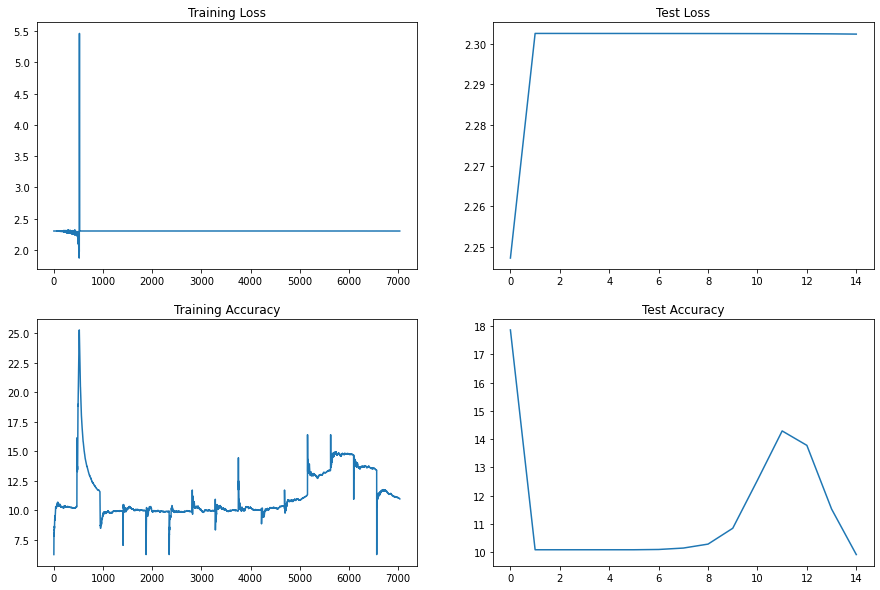

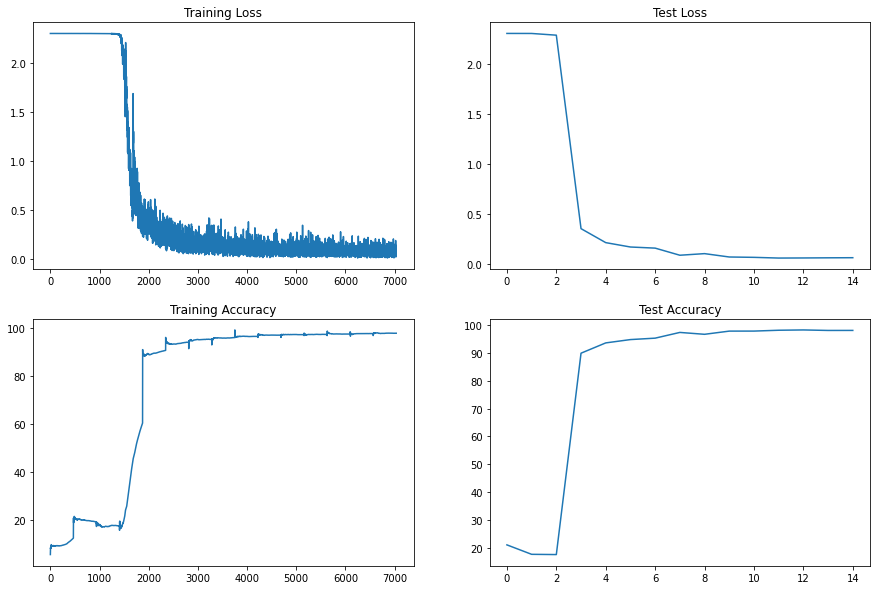

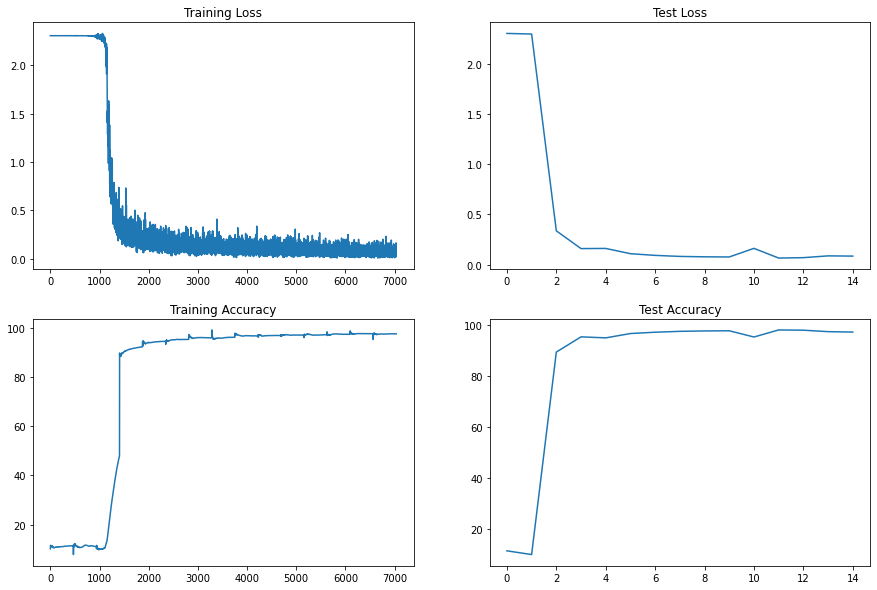

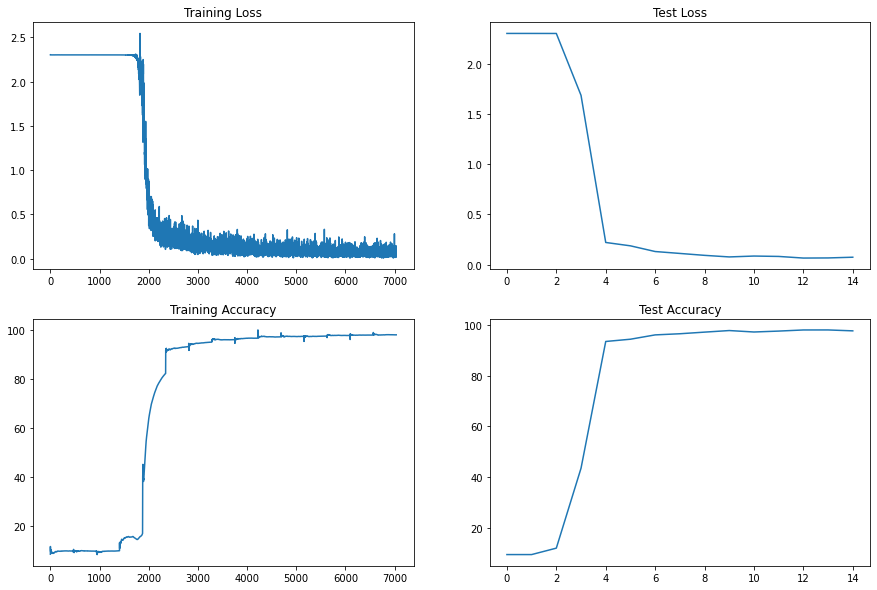

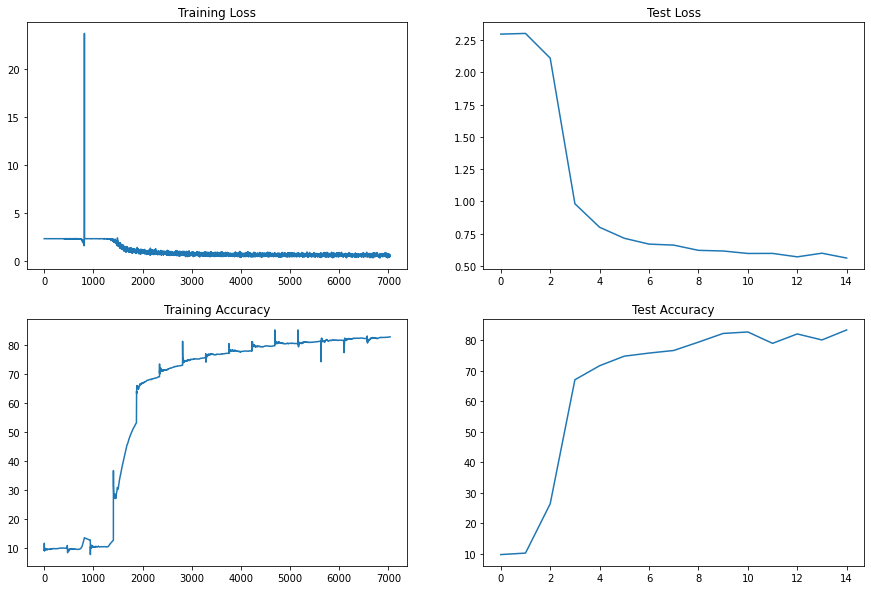

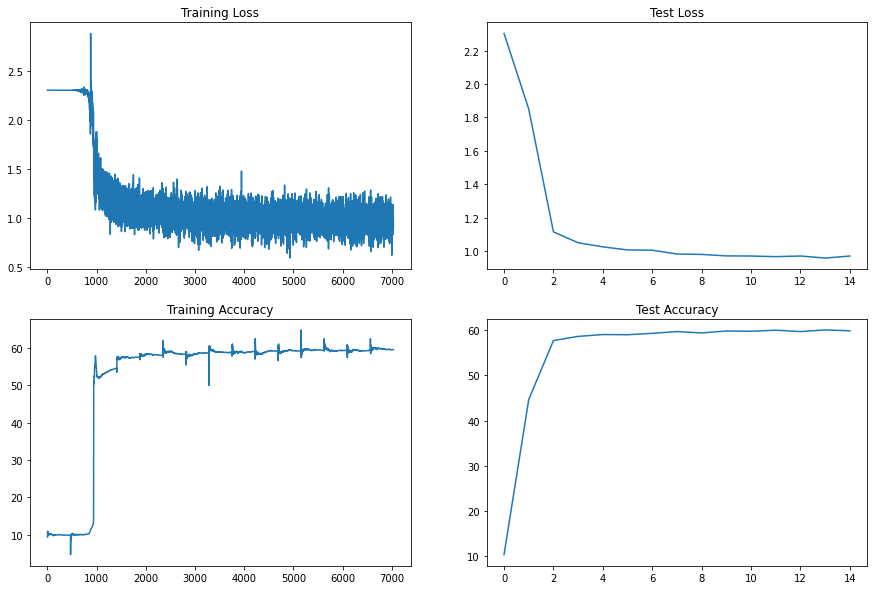

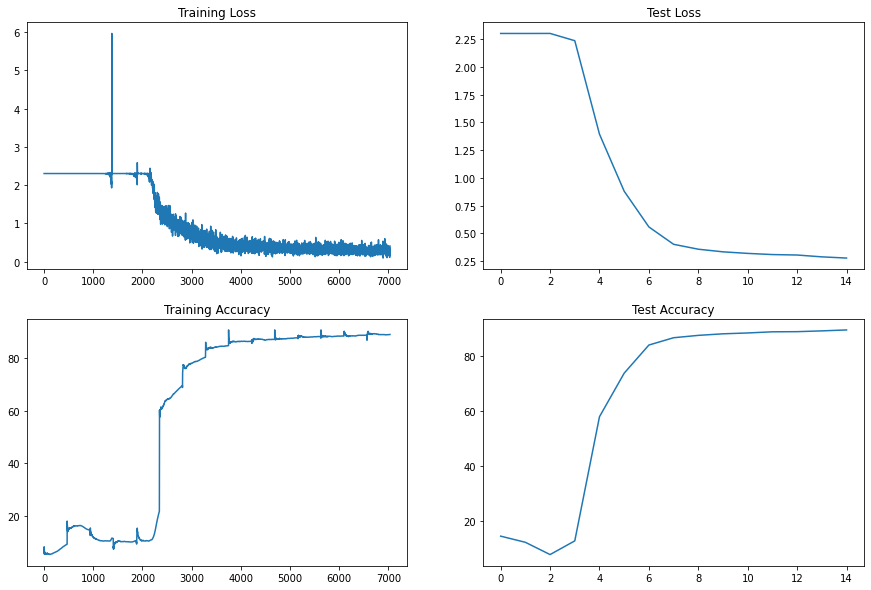

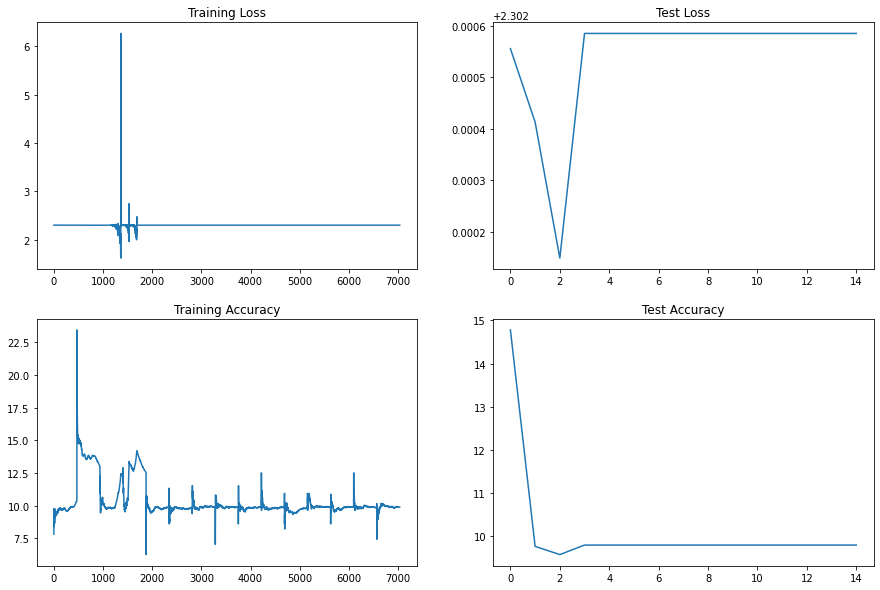

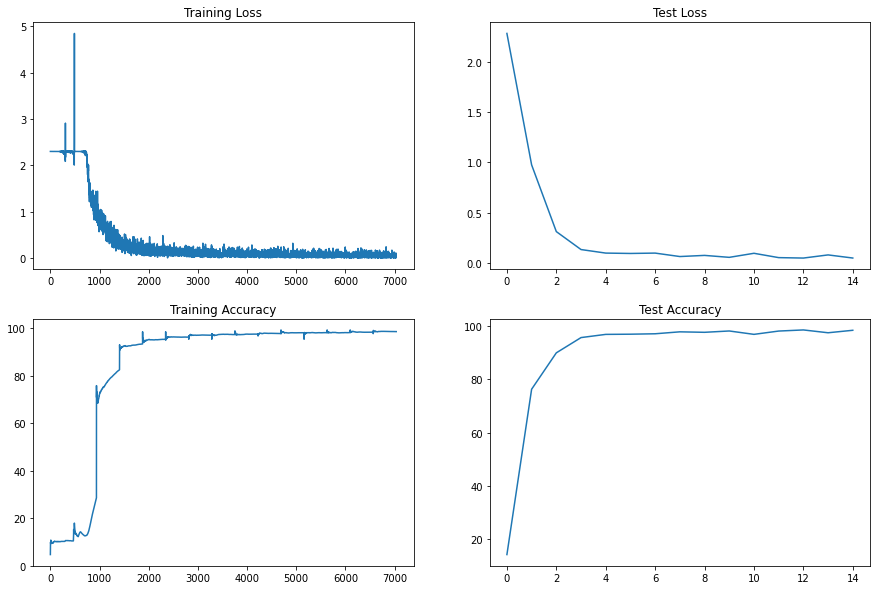

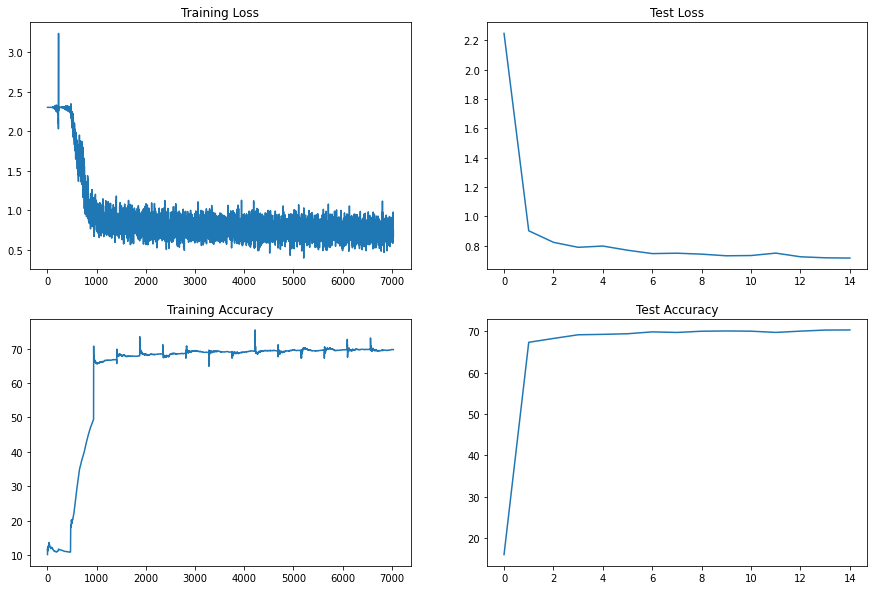

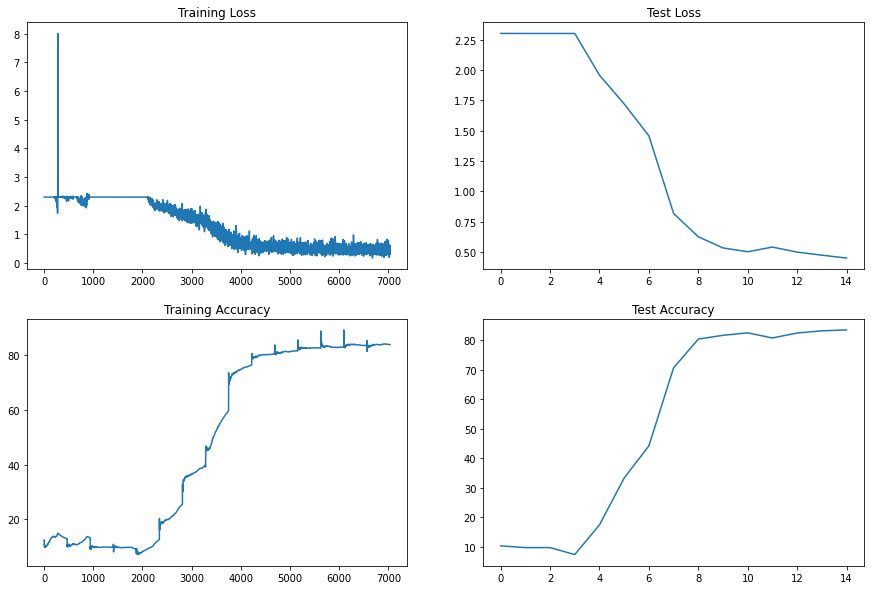

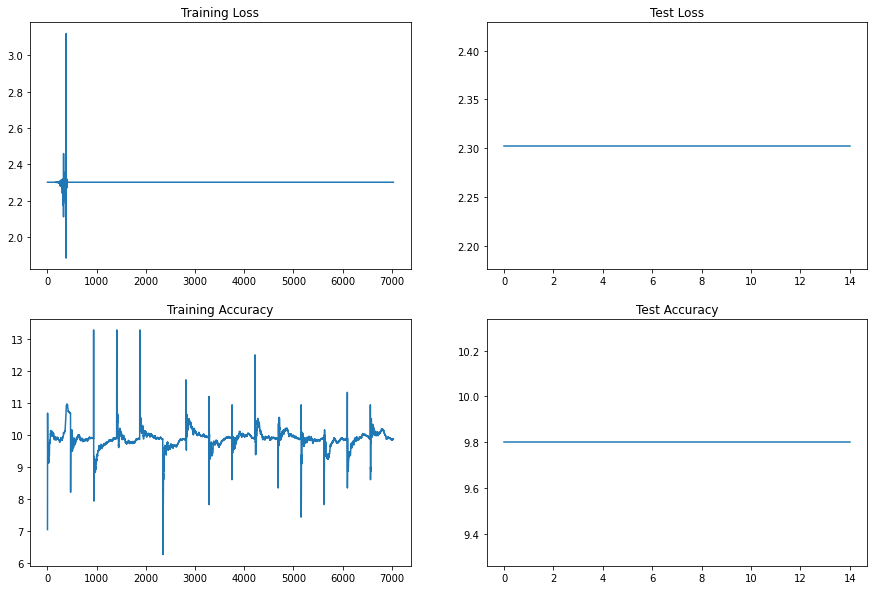

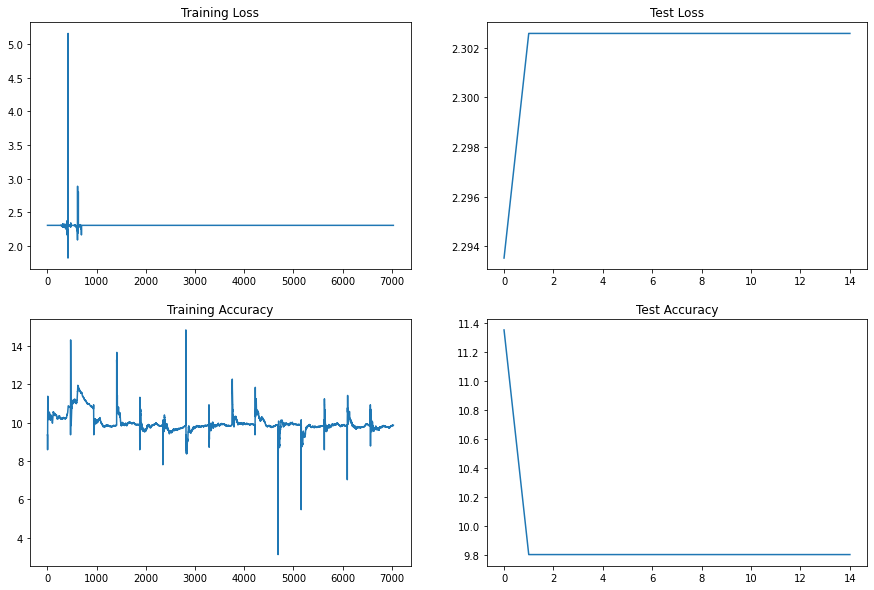

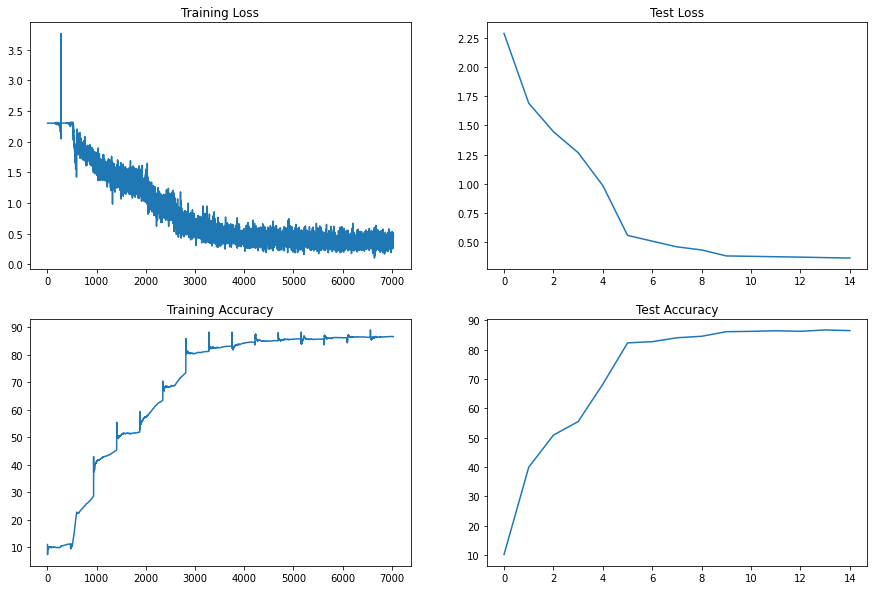

In [53]:
l_rate = [0.006, 0.007, 0.008, 0.009, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055]

for rate in l_rate:  
    print(f' ***No LR reductions - Training for lr - {rate}***')

    model =  Net().to(device)
    train_losses = []
    test_losses = []
    train_acc = []
    test_acc = []
    train_acc_epoch  = []
    loss_dip_dict    = {}
    train_loss_epoch = []
    lr = rate
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    EPOCHS = 15

    for epoch in range(EPOCHS):  
        print("EPOCH:", epoch)
        total_loss_epoch = train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)

        train_loss_epoch.append(total_loss_epoch)

    print('\nMaxium test accuracy: {:.2f}, Achieved in epoch: {}, Max Train accuracy : {:.2f}, Achieved in epoch : {}\n'.format(
        max(test_acc),  np.argmax(test_acc) , max(train_acc_epoch), np.argmax(train_acc_epoch))   )
    
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].plot(train_losses)
    axs[0, 0].set_title("Training Loss")
    axs[1, 0].plot(train_acc)
    axs[1, 0].set_title("Training Accuracy")
    axs[0, 1].plot(test_losses)
    axs[0, 1].set_title("Test Loss")
    axs[1, 1].plot(test_acc)
    axs[1, 1].set_title("Test Accuracy")